In [300]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from itertools import combinations

In [301]:
def get_dataframe(name):
    df = pd.read_csv(f'{name}.csv')
    df = df.dropna()
    return df

In [320]:
name = 'Mortality Dataset'
df = get_dataframe(name)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [303]:
df_female = df[df['sex'] == 0]
df_male = df[df['sex'] == 1]
df_smoker = df[df['smoking'] == 1]
df_non_smoker = df[df['smoking'] == 0]
df_female_smoker = df_smoker[df_smoker['sex'] == 0]
df_male_smoker = df_smoker[df_smoker['sex'] == 1]

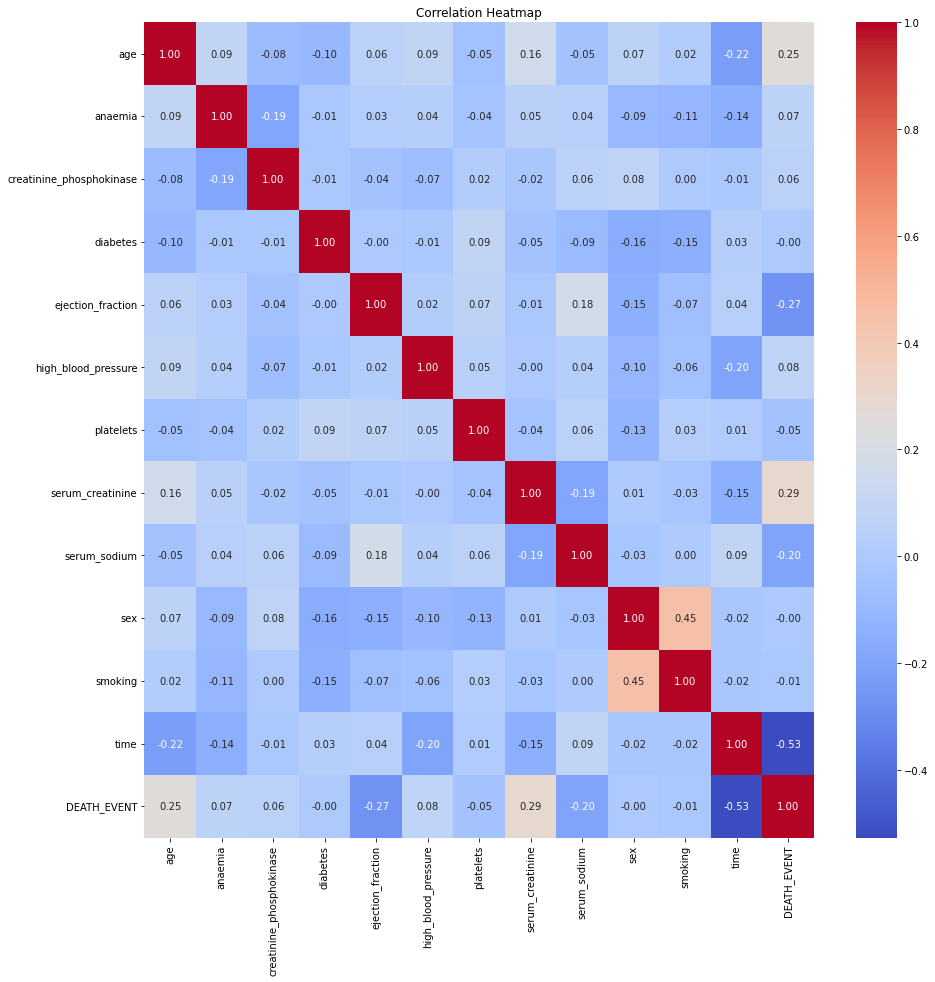

In [254]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

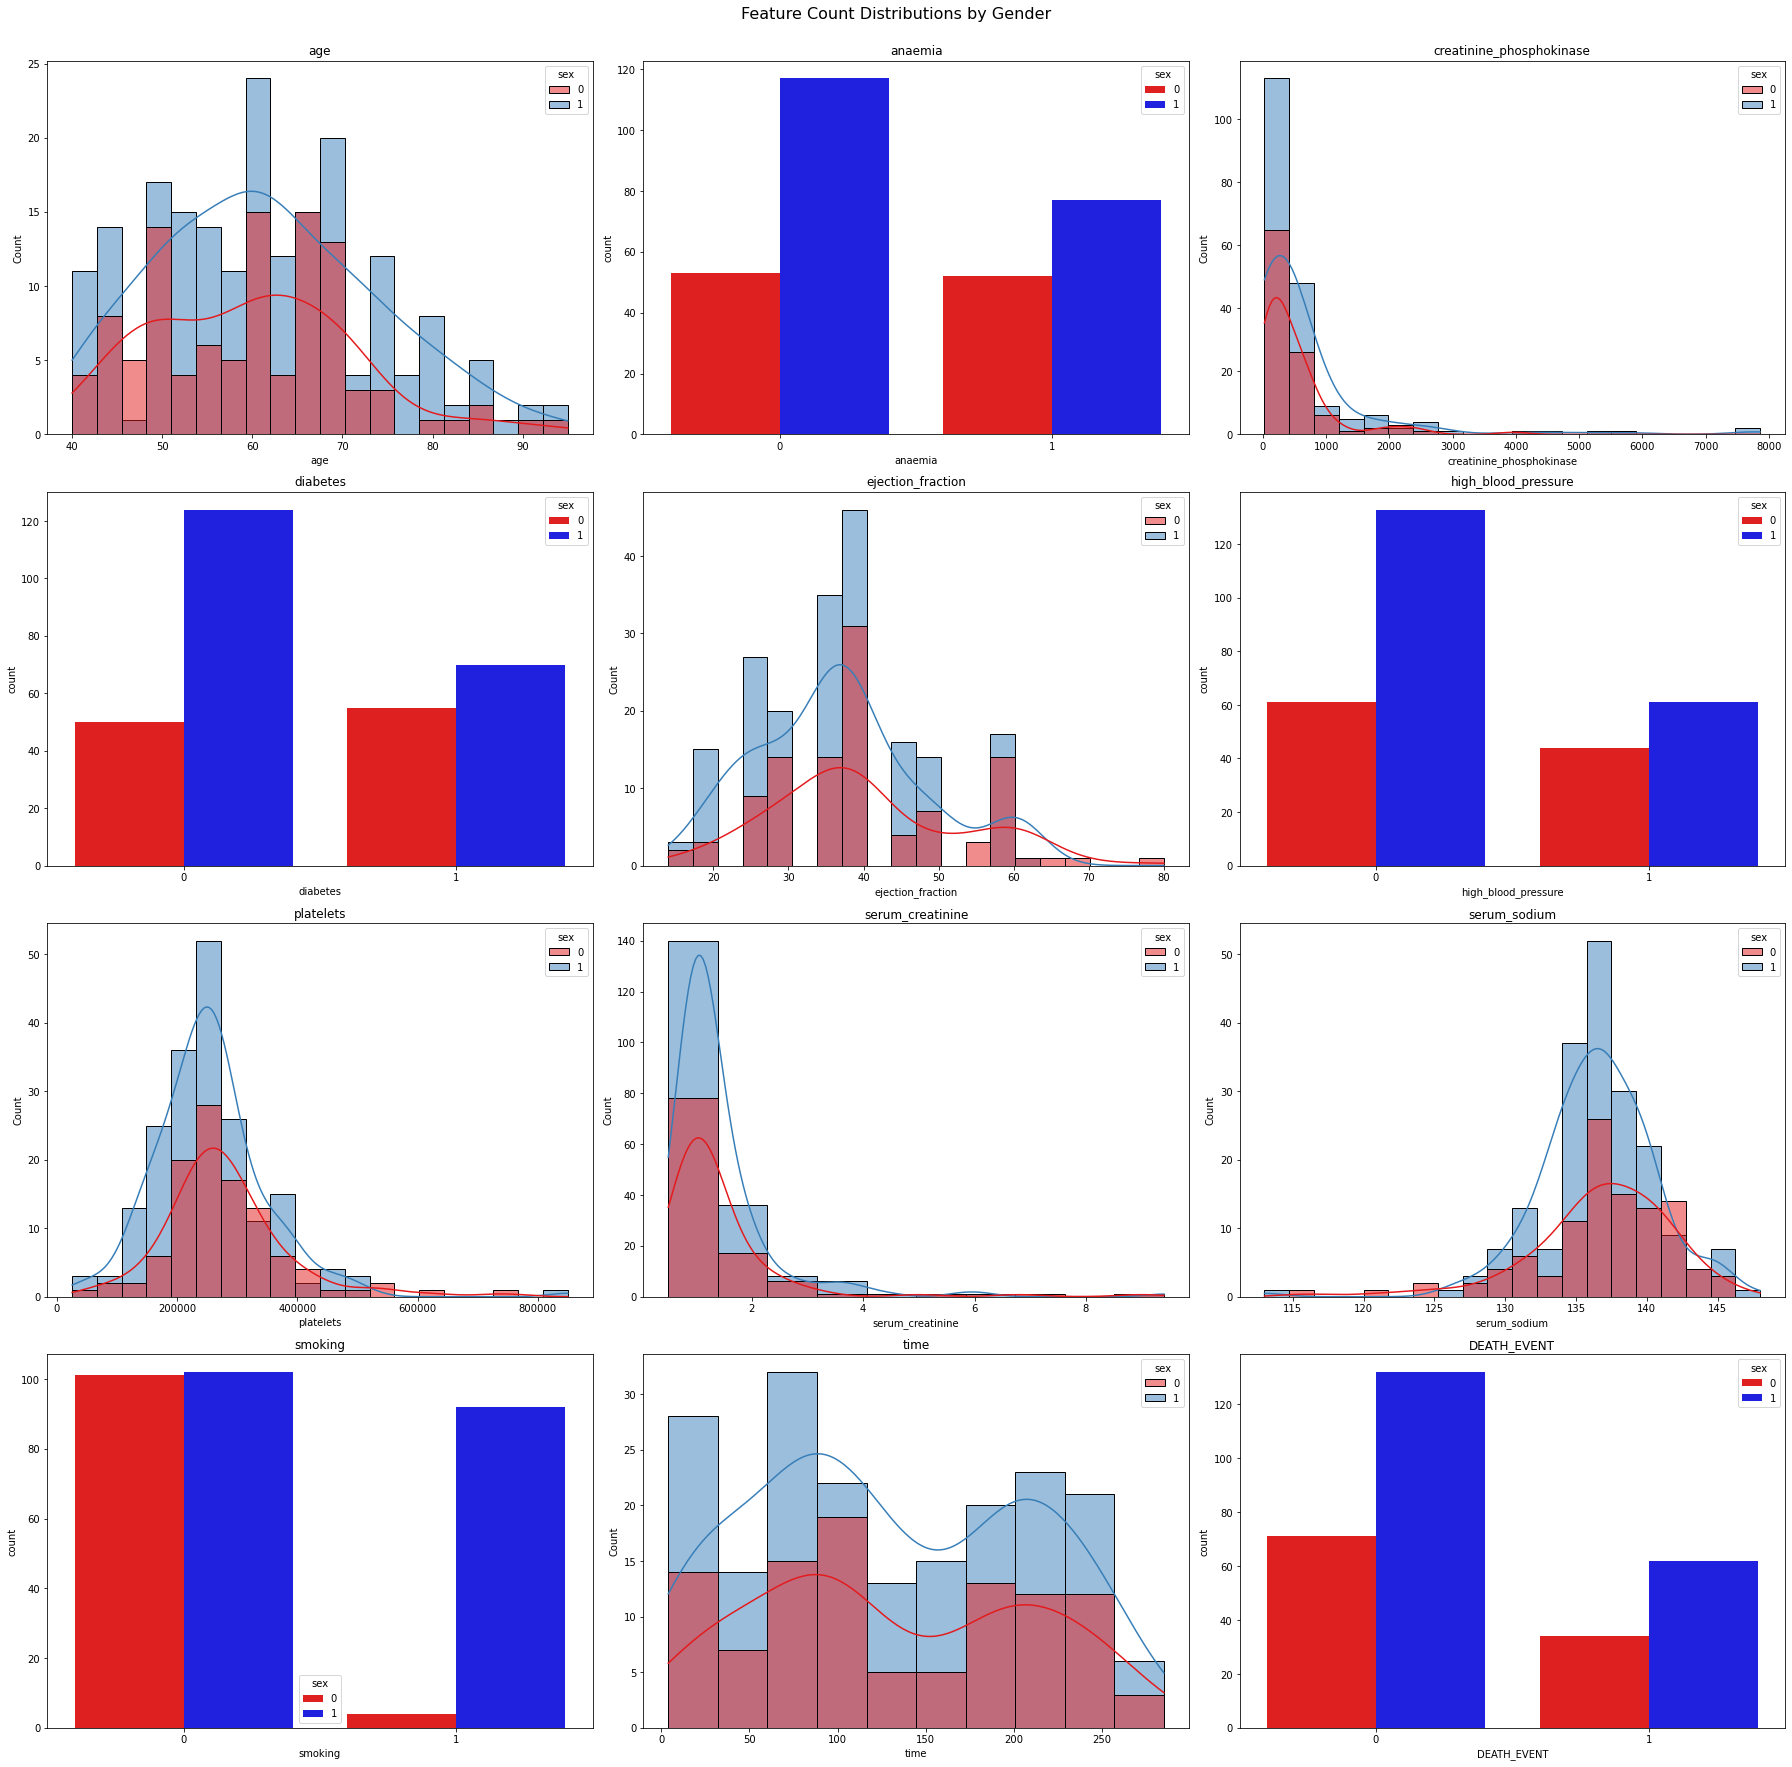

In [259]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25))
fig.suptitle("Feature Count Distributions by Gender", fontsize=16)

variables = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time', 'DEATH_EVENT']
bins_arr = [20, 2, 20, 2, 20, 2, 20, 10, 20, 2, 10, 2]

for i, variable in enumerate(variables):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    if bins_arr[i] == 2:
        sns.countplot(data=df, x=variable, hue='sex', ax=ax, palette={1: 'blue', 0: 'red'})
    else: 
        sns.histplot(data=df, x=variable, bins=bins_arr[i], kde=True, hue='sex', palette='Set1', ax=ax)
    ax.set_title(f'{variable}')


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

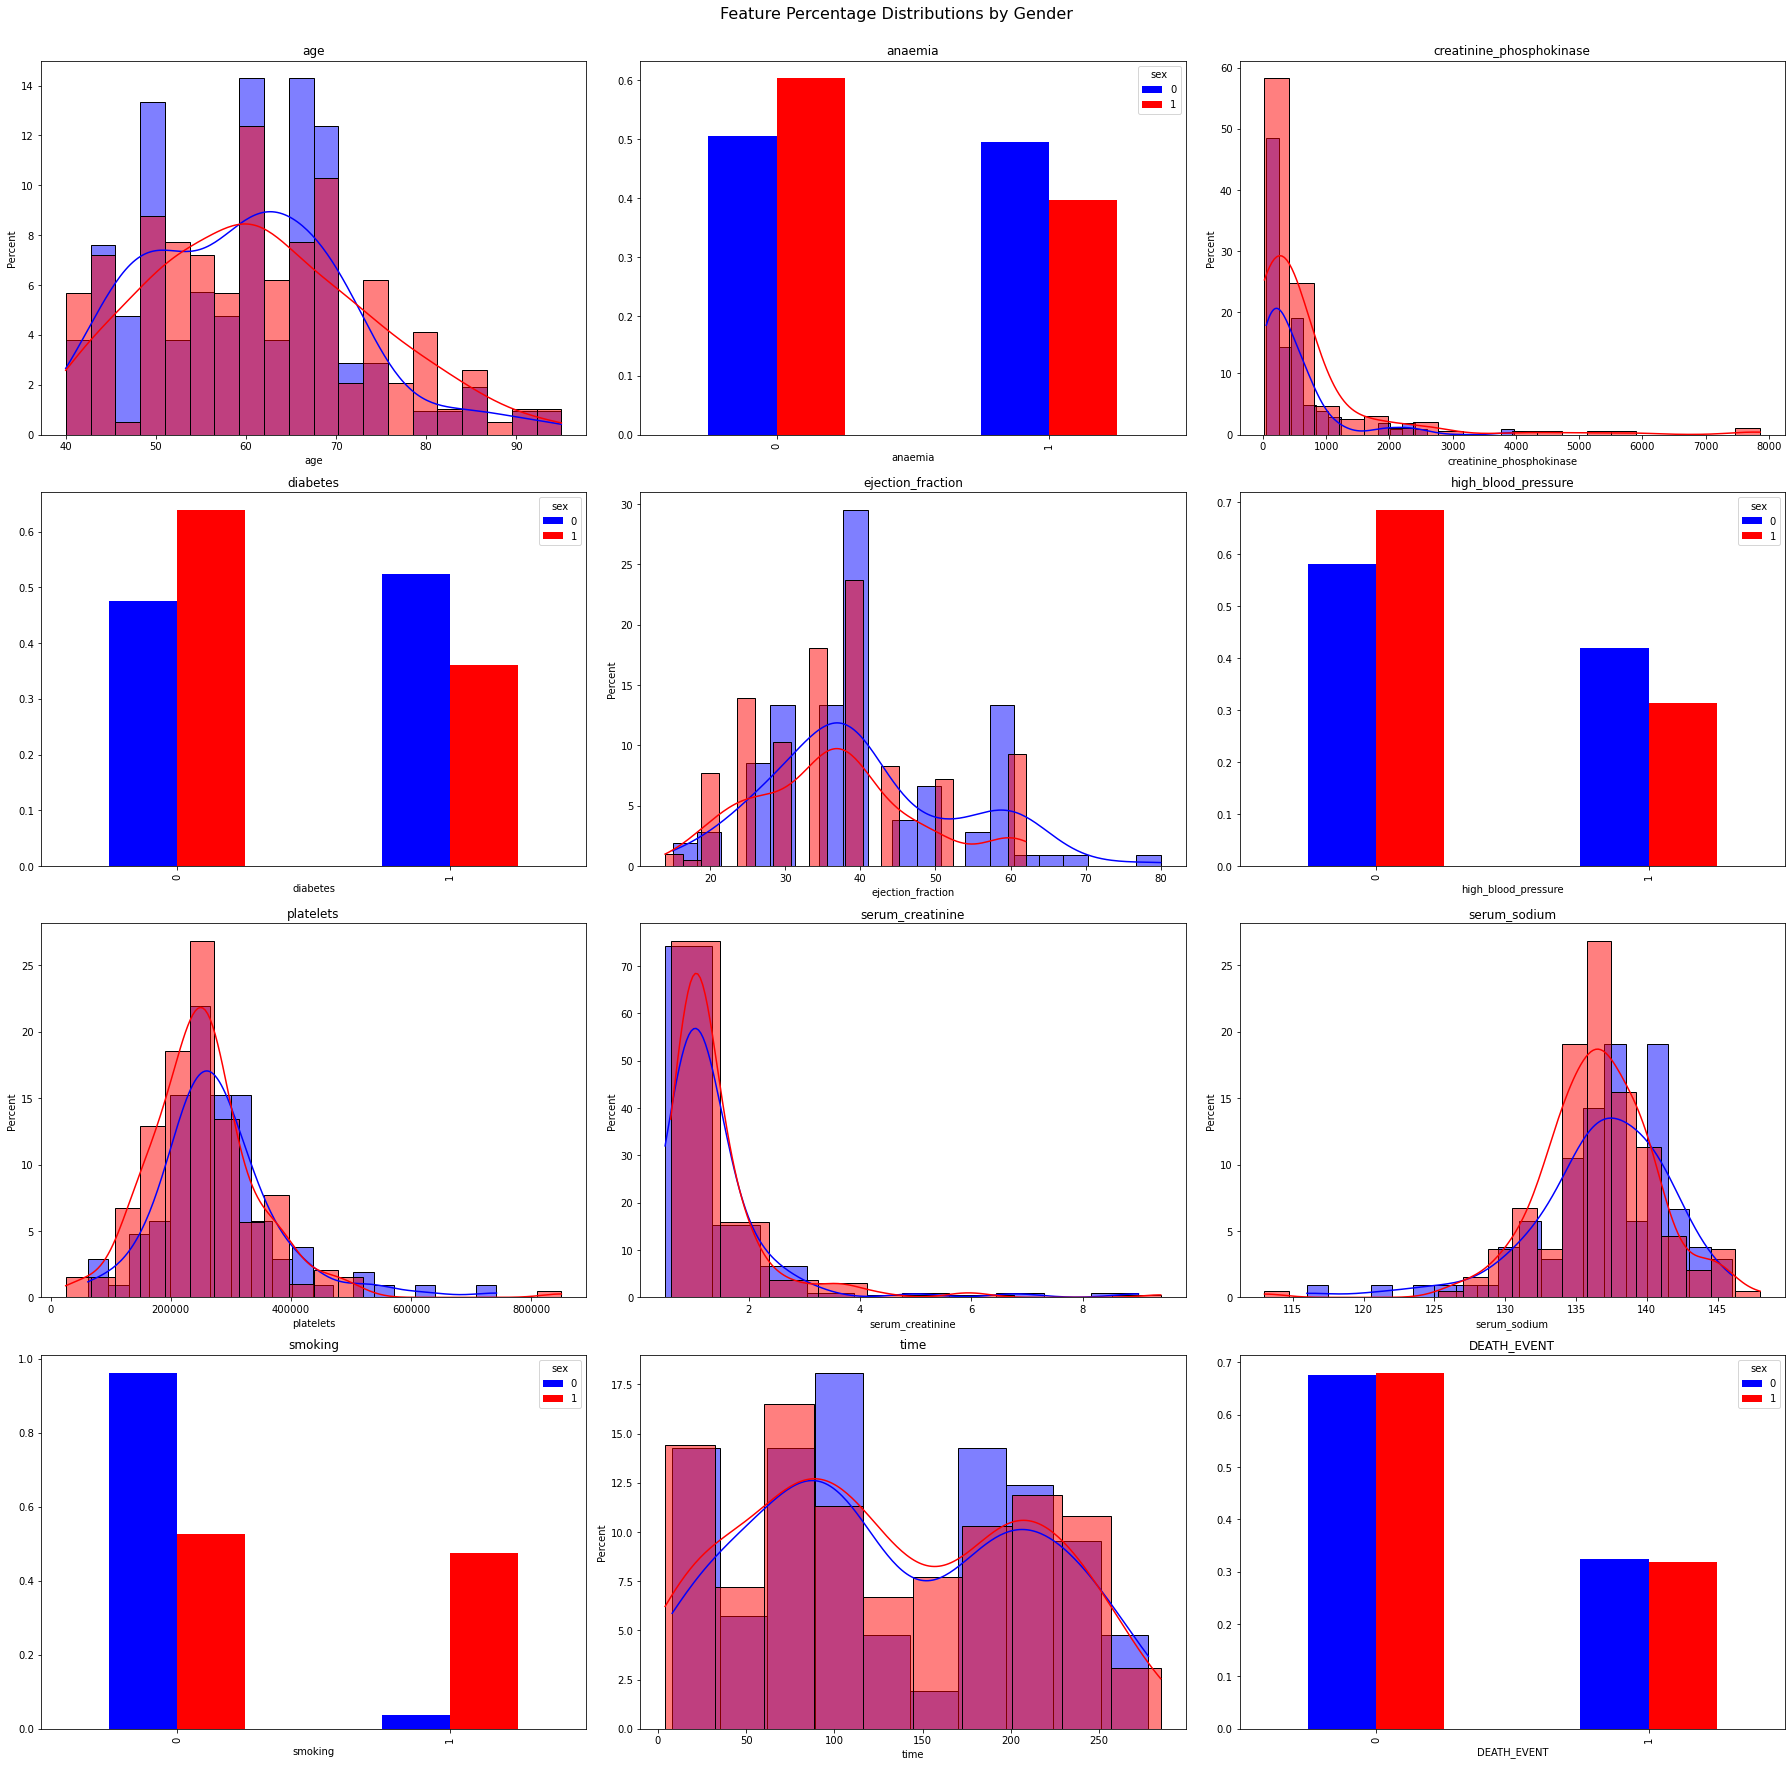

In [260]:
df_female = df[df['sex'] == 0]
df_male = df[df['sex'] == 1]

fig, axes = plt.subplots(4, 3, figsize=(25, 25))
fig.suptitle("Feature Percentage Distributions by Gender", fontsize=16)

variables = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time', 'DEATH_EVENT']
bins_arr = [20, 2, 20, 2, 20, 2, 20, 10, 20, 2, 10, 2]

for i, variable in enumerate(variables):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    if bins_arr[i] == 2:
        data_grouped = df.groupby(['sex', variable])[variable].count().unstack().fillna(0)
        data_grouped_percentage = data_grouped.divide(data_grouped.sum(axis=1), axis=0)
        data_grouped_percentage.T.plot(kind='bar', stacked=False, ax=ax, color=['blue', 'red'])
    else: 
        sns.histplot(data=df_female, x=variable, bins=bins_arr[i], kde=True, stat='percent', label='Female', color='blue', ax=ax)
        sns.histplot(data=df_male, x=variable, bins=bins_arr[i], kde=True, stat='percent', label='Male', color='red', ax=ax)
    ax.set_title(f'{variable}')
    


plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


MSE: 0.18028241159968109
R2 Score: 0.2553352708019293


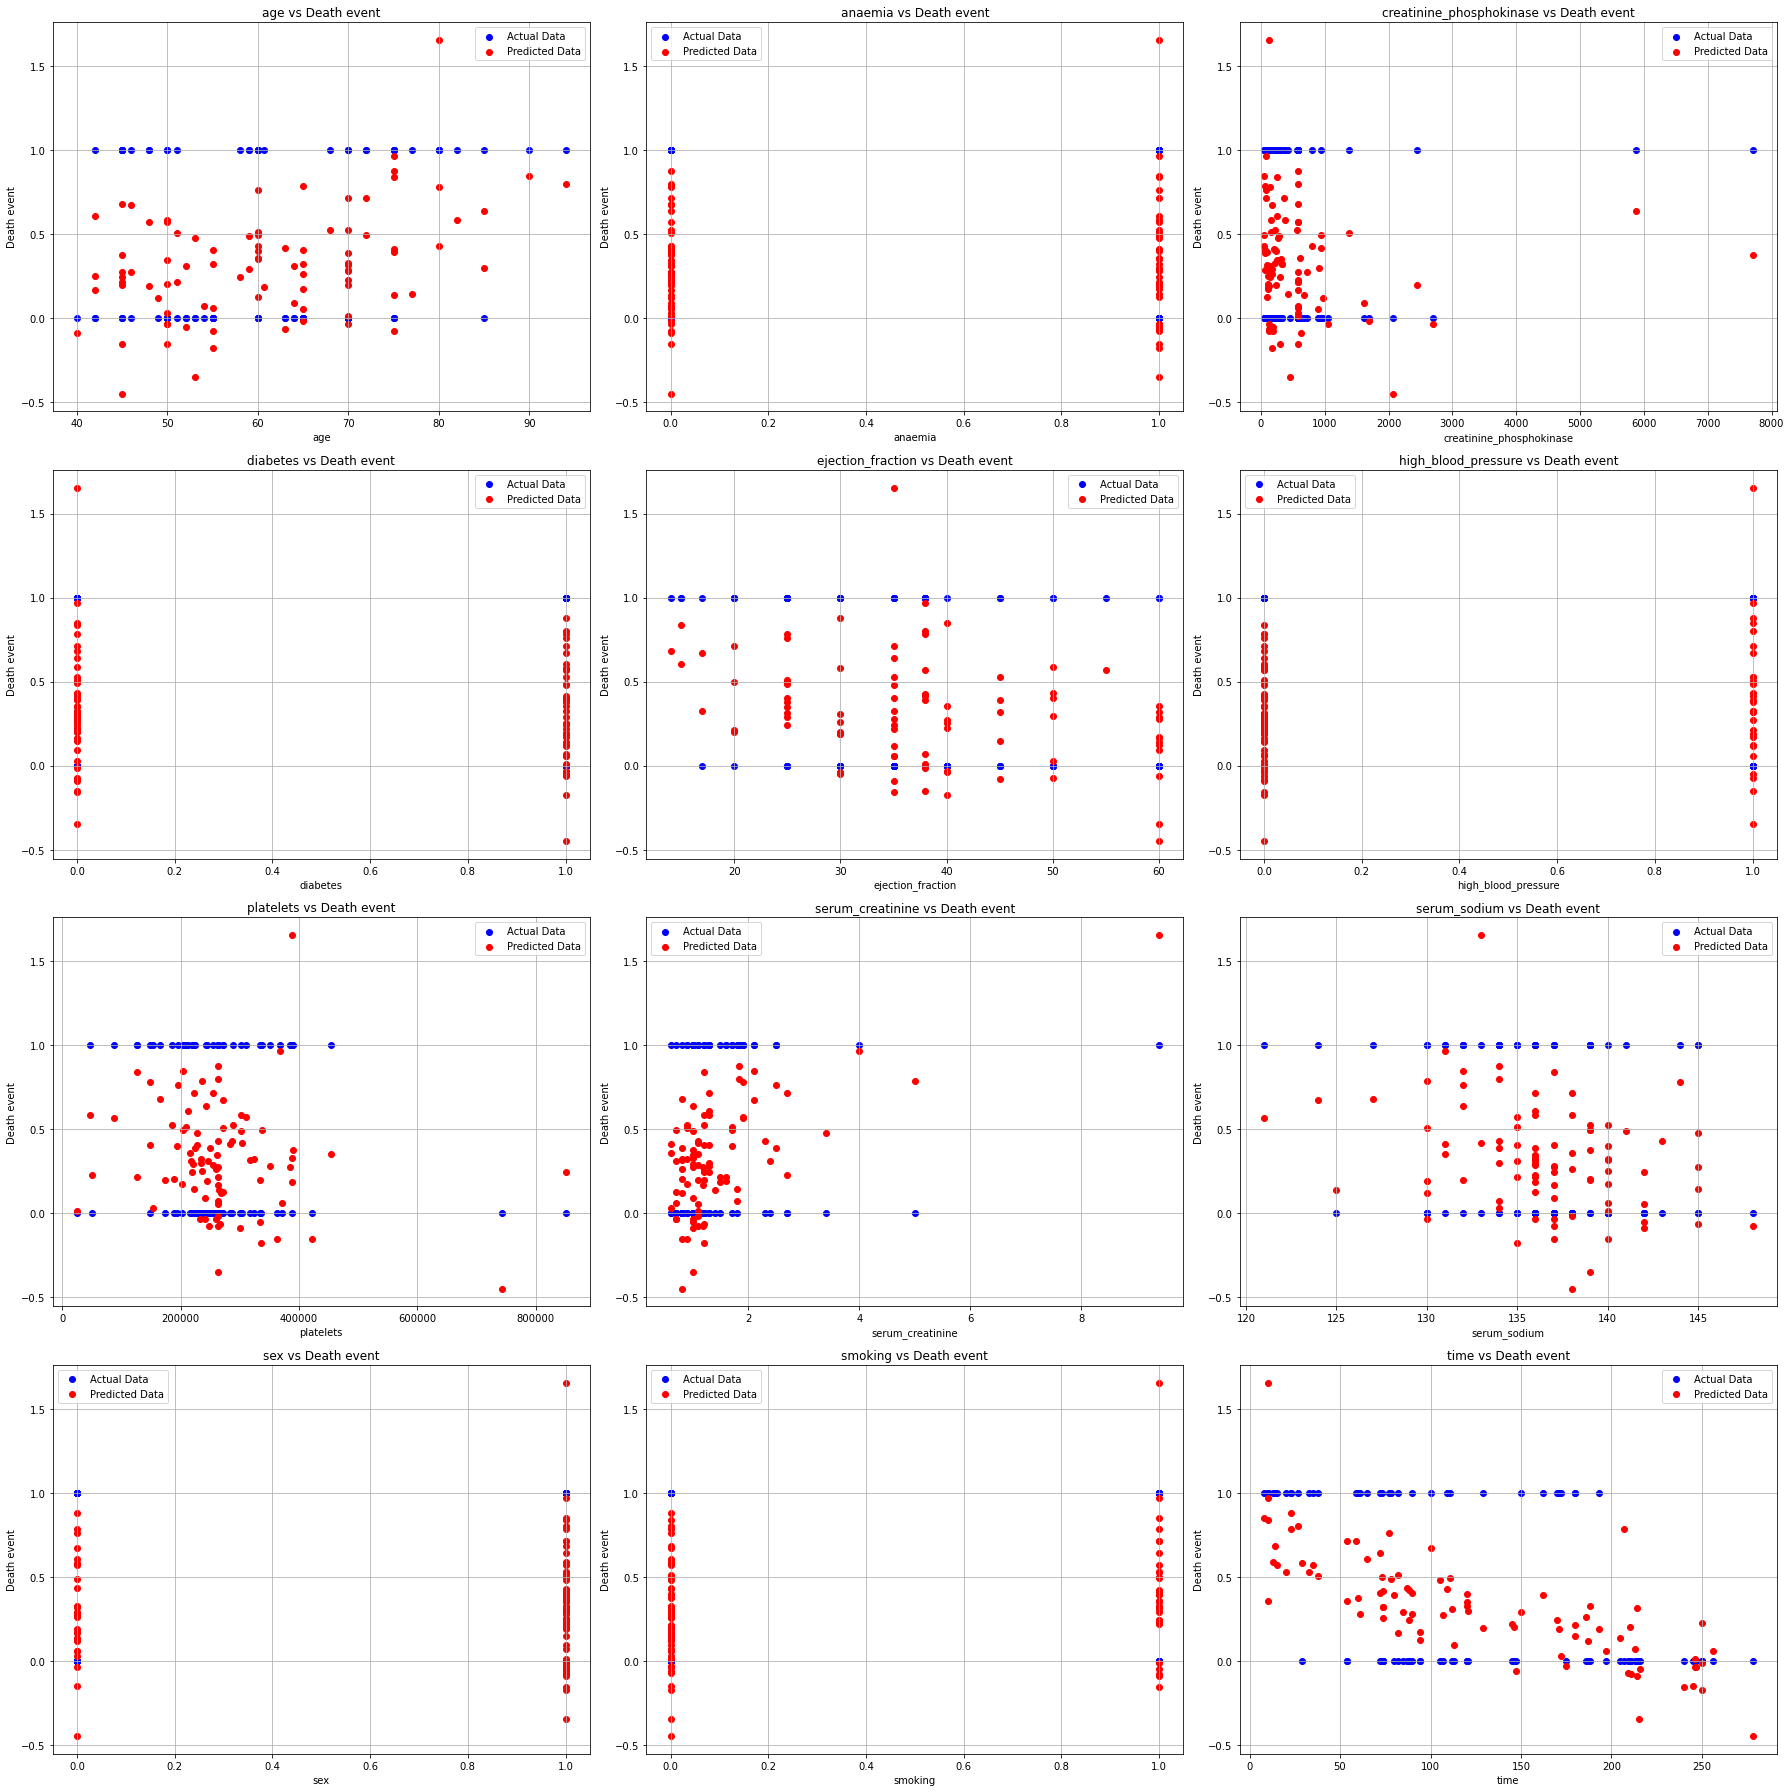

In [266]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs = axs.ravel()

for i, feature in enumerate(features):
    axs[i].scatter(X_test[feature], y_test, color='blue', label='Actual Data')
    axs[i].scatter(X_test[feature], y_pred, color='red', label='Predicted Data')
    axs[i].set_title(f"{feature} vs Death event")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Death event")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Accuracy: 0.8
Precision: 0.88
Recall: 0.5945945945945946
F1 Score: 0.7096774193548386
Confusion Matrix:
[[50  3]
 [15 22]]


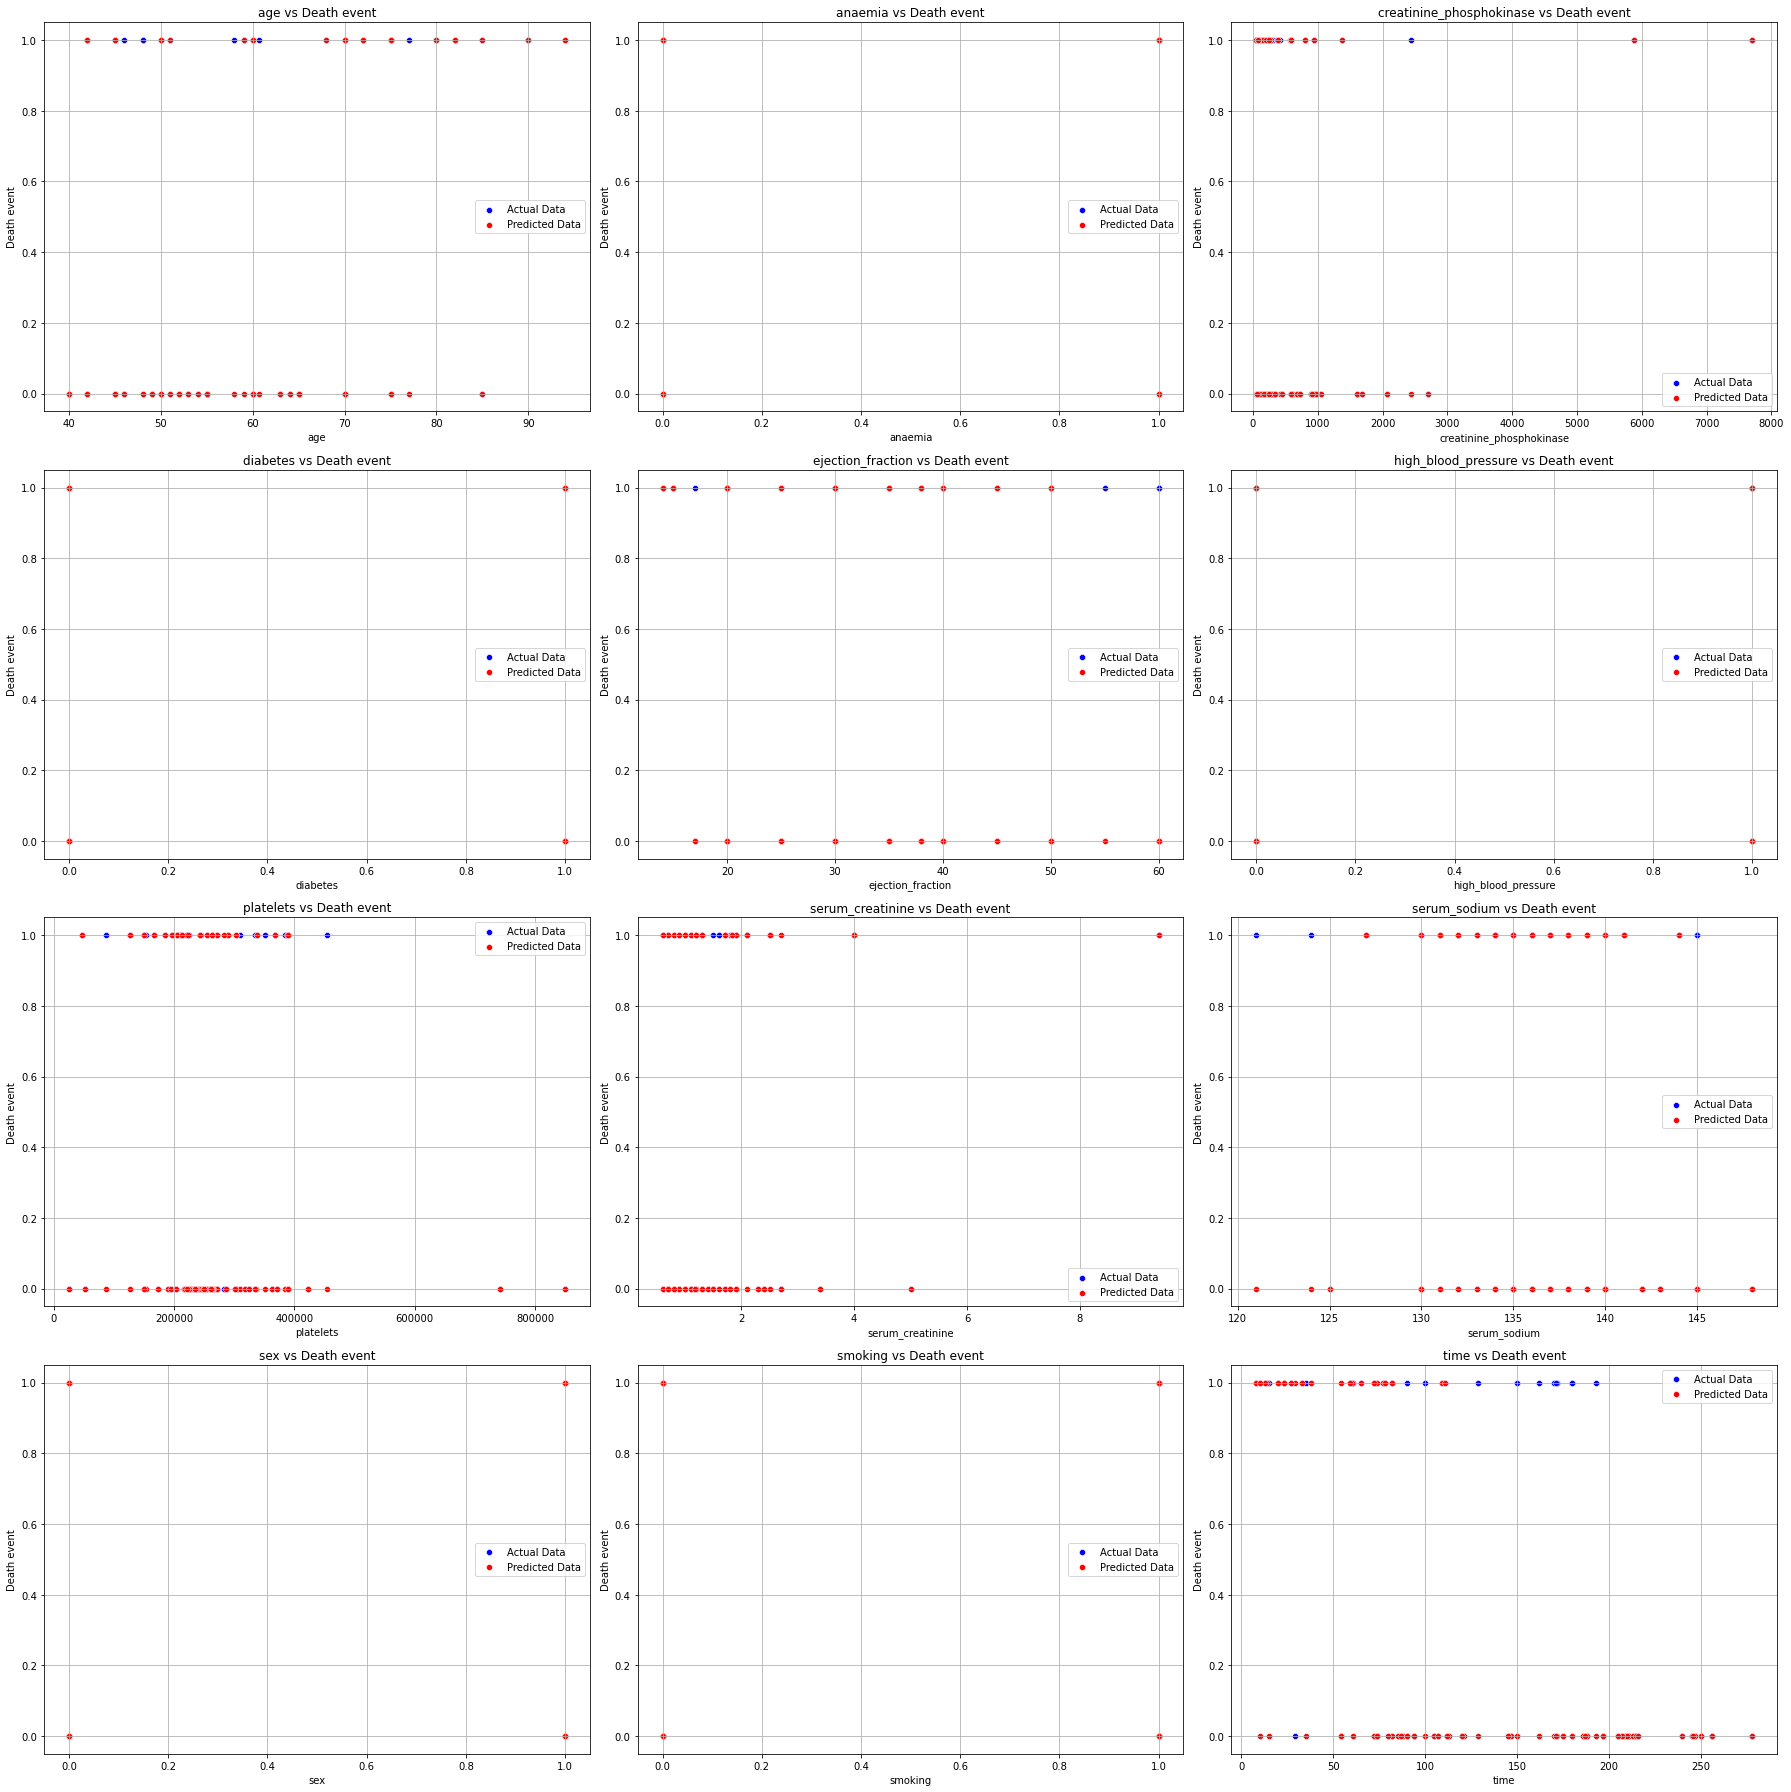

In [267]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

fig, axs = plt.subplots(4, 3, figsize=(25, 25))
axs = axs.ravel()

for i, feature in enumerate(features):
    sns.scatterplot(x=X_test[feature], y=y_test, color='blue', label='Actual Data', ax=axs[i])
    sns.scatterplot(x=X_test[feature], y=y_pred, color='red', label='Predicted Data', ax=axs[i])
    axs[i].set_title(f"{feature} vs Death event")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Death event")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


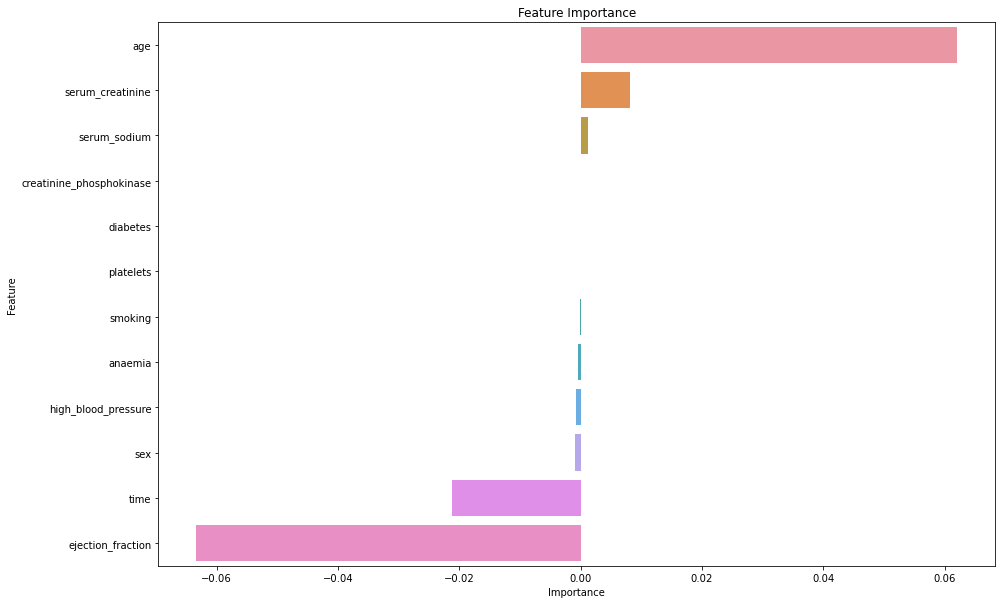

In [268]:
logistic_feature_importance = logistic_model.coef_[0]
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': logistic_feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


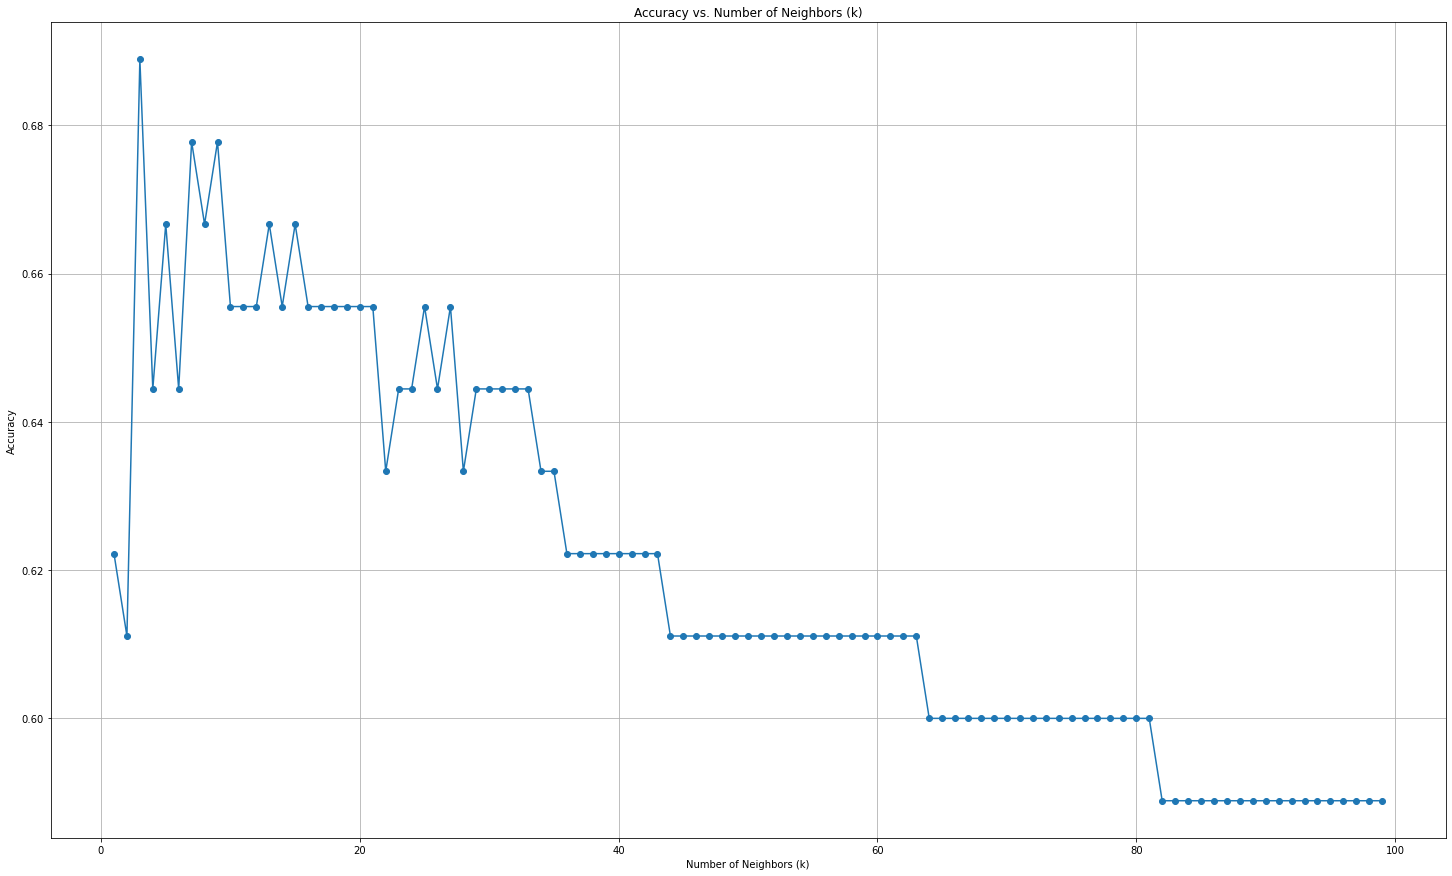

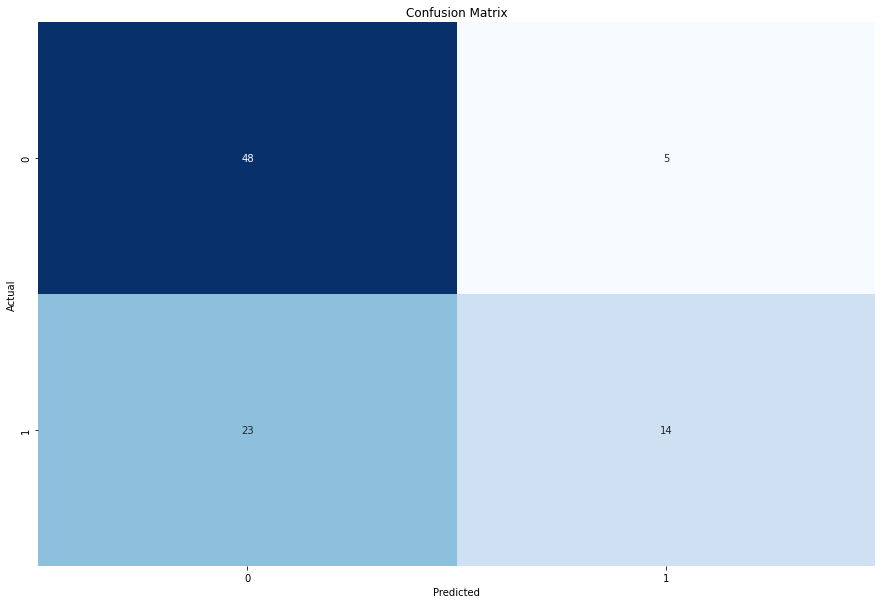

Accuracy: 0.6888888888888889
Precision: 0.7010460423358866
Recall: 0.6888888888888889
F1-Score: 0.6614695340501792


In [291]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

In [304]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
all_feature_combinations = []
for r in range(1, len(features) + 1):
    combinations_r = combinations(features, r)
    all_feature_combinations.extend(combinations_r)

all_feature_combinations = list(all_feature_combinations)

In [311]:
best_comb = ''
best_comb_acc = 0


for i, combination in enumerate(all_feature_combinations):
    
    if (i%100 == 0):
        print(i)
    X = df[list(combination)]
    y = df['DEATH_EVENT']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    k_values = []
    accuracy_values = []
    best_k = 0
    max_acc = 0

    max_range = 50 if 50 <= len(X_train_scaled) else len(X_train_scaled)-1
    for k in range(1, max_range):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)
        y_pred = knn_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        k_values.append(k)
        accuracy_values.append(accuracy)
        if accuracy > max_acc:
            max_acc = accuracy
            best_k = k

    if max_acc > best_comb_acc:
        best_comb_acc = max_acc
        best_comb = combination


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000


In [312]:
print(best_comb)
print(best_comb_acc)

('ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'time')
0.8444444444444444


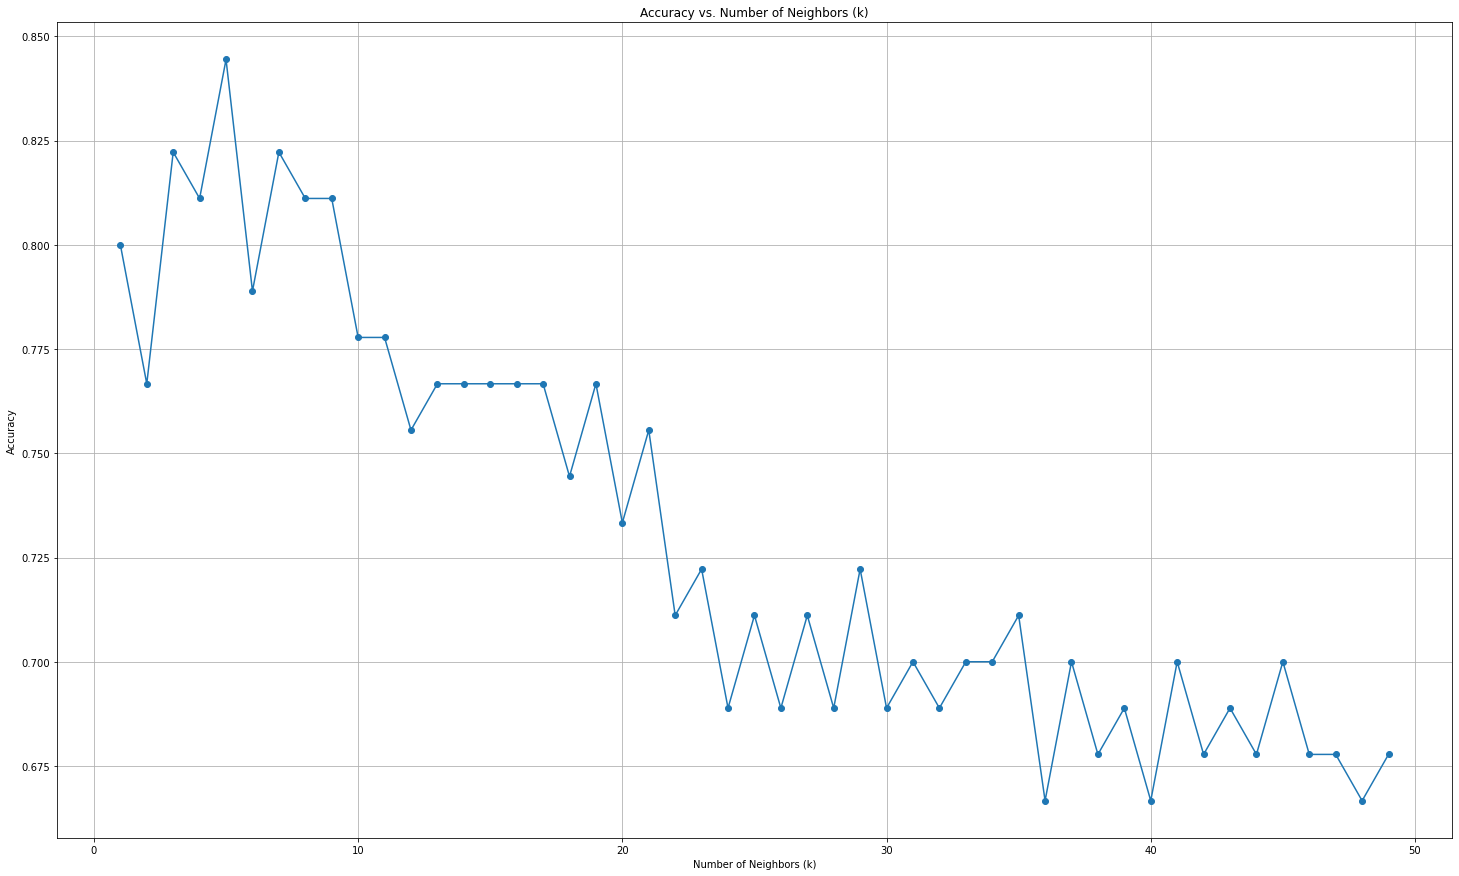

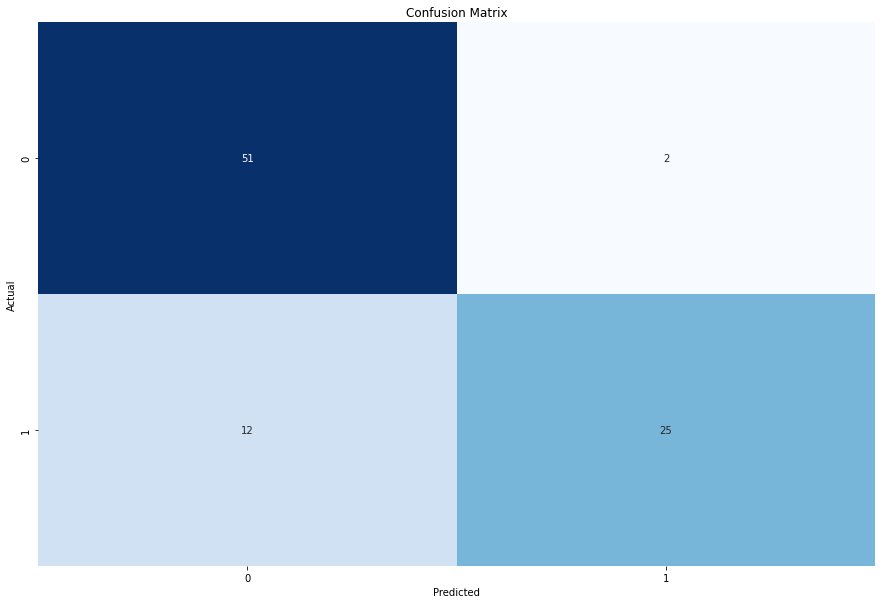

Accuracy: 0.8444444444444444
Precision: 0.8573780129335685
Recall: 0.8444444444444444
F1-Score: 0.8389966475095787


In [324]:
#KNN on best combination

X = df[list(best_comb)]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 50):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

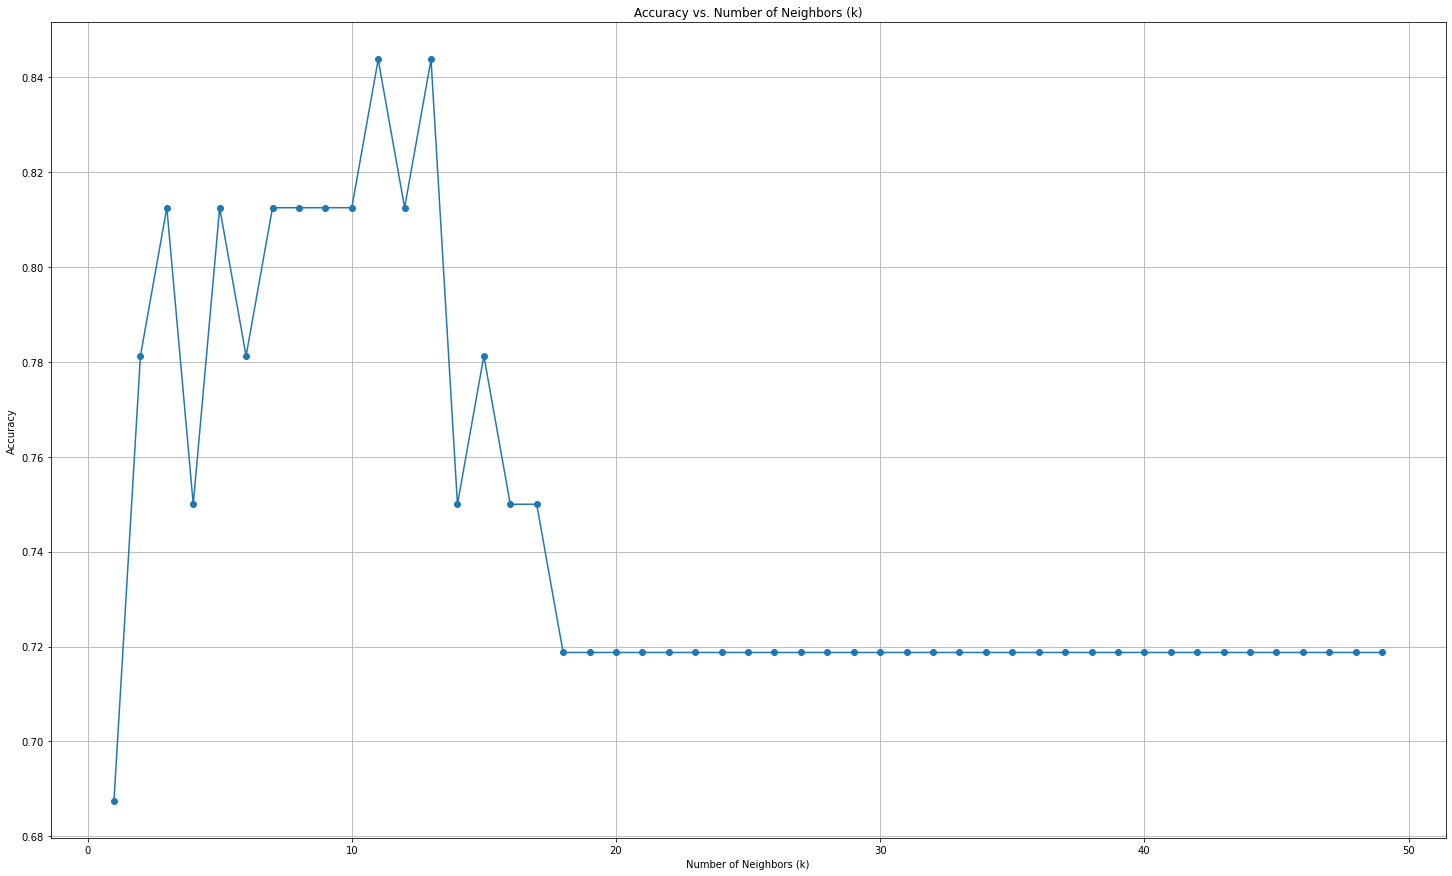

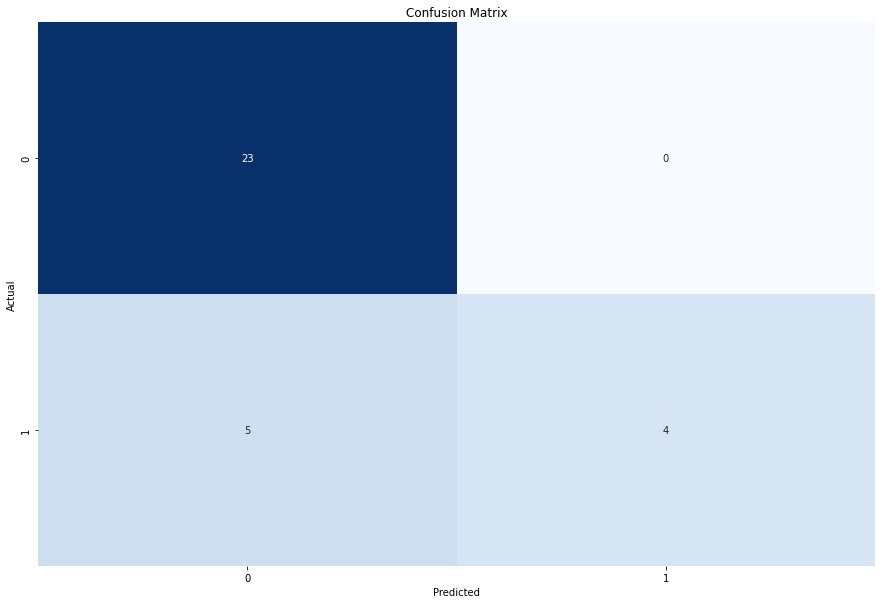

Accuracy: 0.84375
Precision: 0.8716517857142857
Recall: 0.84375
F1-Score: 0.8213612368024132


In [325]:
#KNN on female patients

X = df_female[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time']]
y = df_female['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 50):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

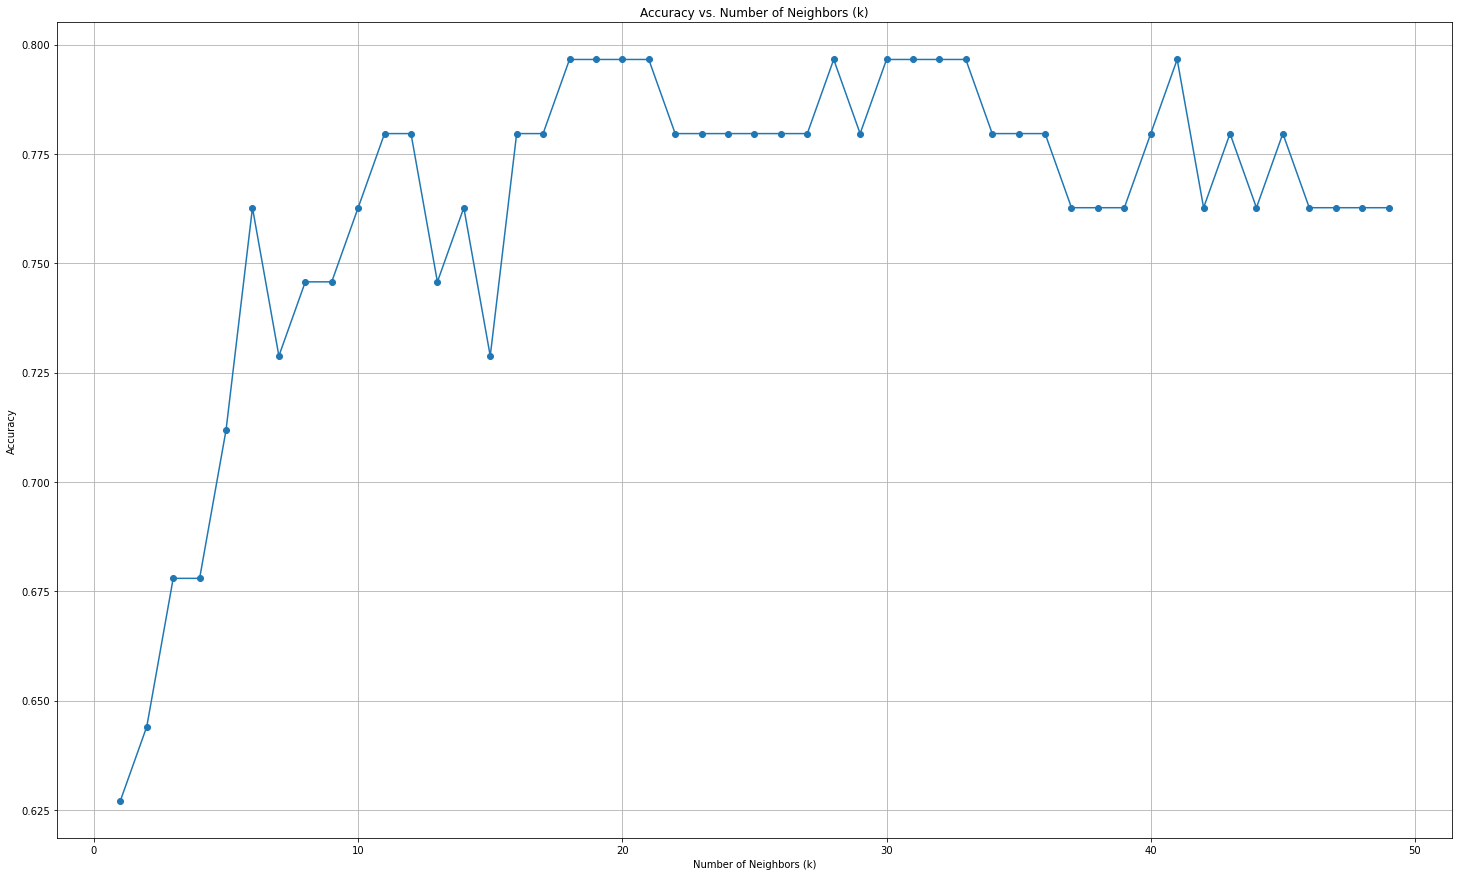

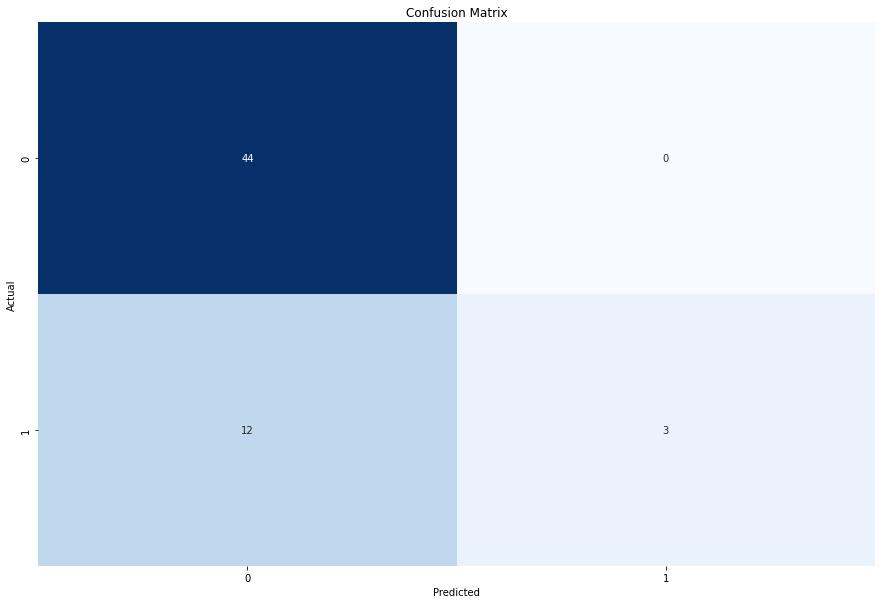

Accuracy: 0.7966101694915254
Precision: 0.8401937046004843
Recall: 0.7966101694915254
F1-Score: 0.7410169491525423


In [326]:
#KNN on male patients

X = df_male[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time']]
y = df_male['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 50):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

In [327]:
age_bins = [40, 65, float('inf')]
age_labels = [1, 2]
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1


In [328]:
df_age1_bin = df[df['age_bin'] == 1]
df_age2_bin = df[df['age_bin'] == 2]
print(len(df_age1_bin), len(df_age2_bin))

203 89


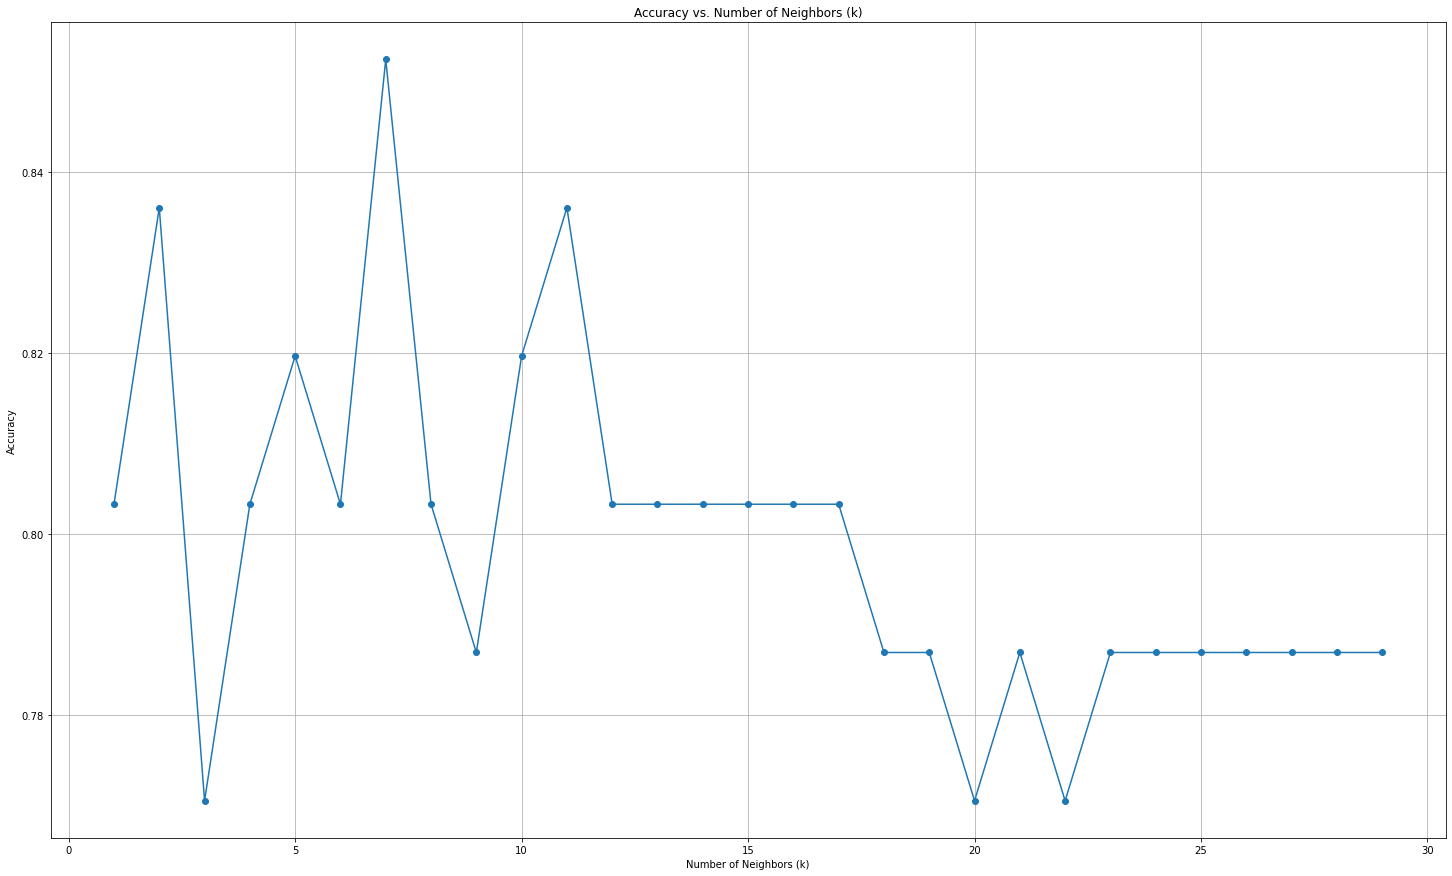

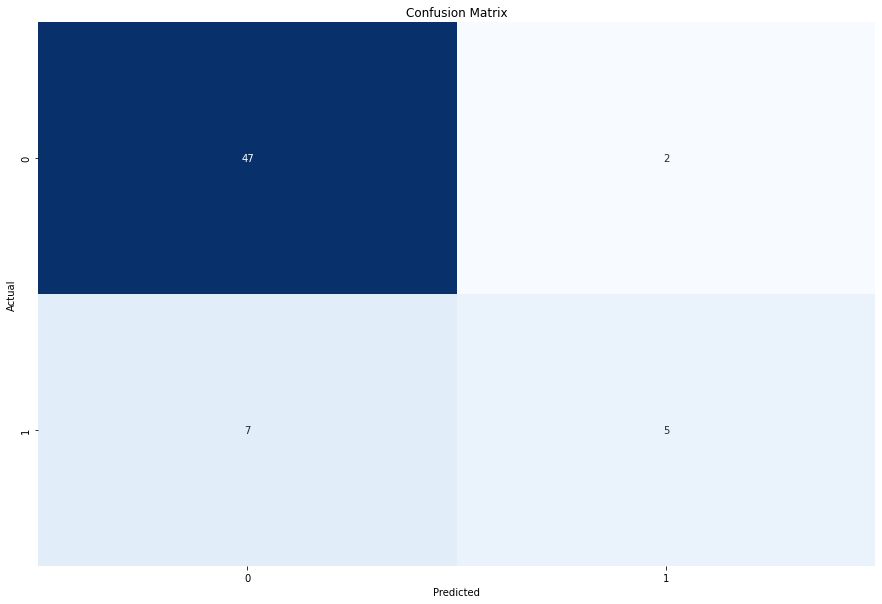

Accuracy: 0.8524590163934426
Precision: 0.8396651921242084
Recall: 0.8524590163934426
F1-Score: 0.836626820911901


In [330]:
X = df_age1_bin[['sex', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'smoking', 'serum_creatinine', 'serum_sodium', 'time']]
y = df_age1_bin['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 30):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

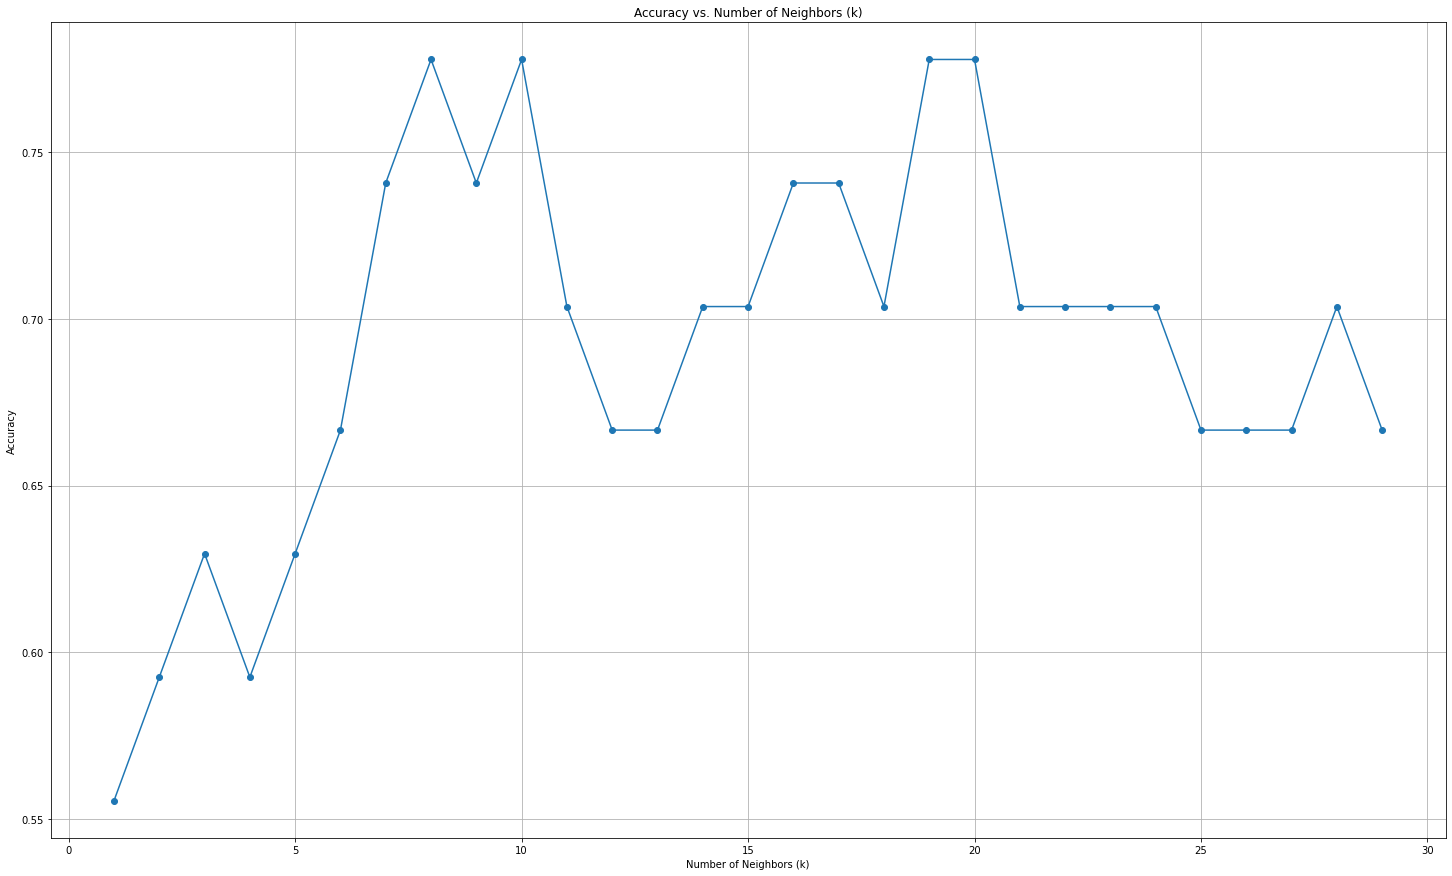

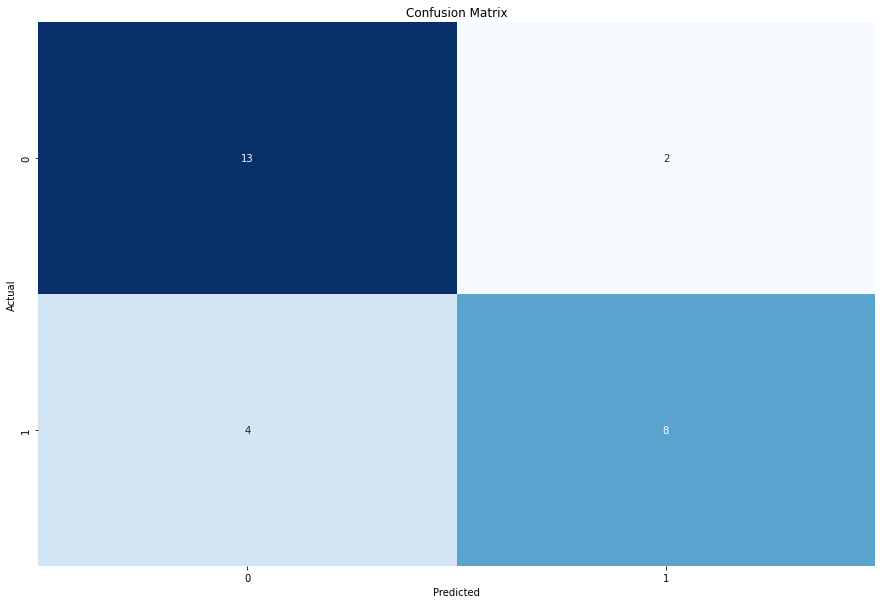

Accuracy: 0.7777777777777778
Precision: 0.7803921568627451
Recall: 0.7777777777777778
F1-Score: 0.774621212121212


In [331]:
X = df_age2_bin[['sex', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'smoking', 'serum_creatinine', 'serum_sodium', 'time']]
y = df_age2_bin['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 30):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(25, 15))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

c:\Users\13980611\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\13980611\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\13980611\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\13980611\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

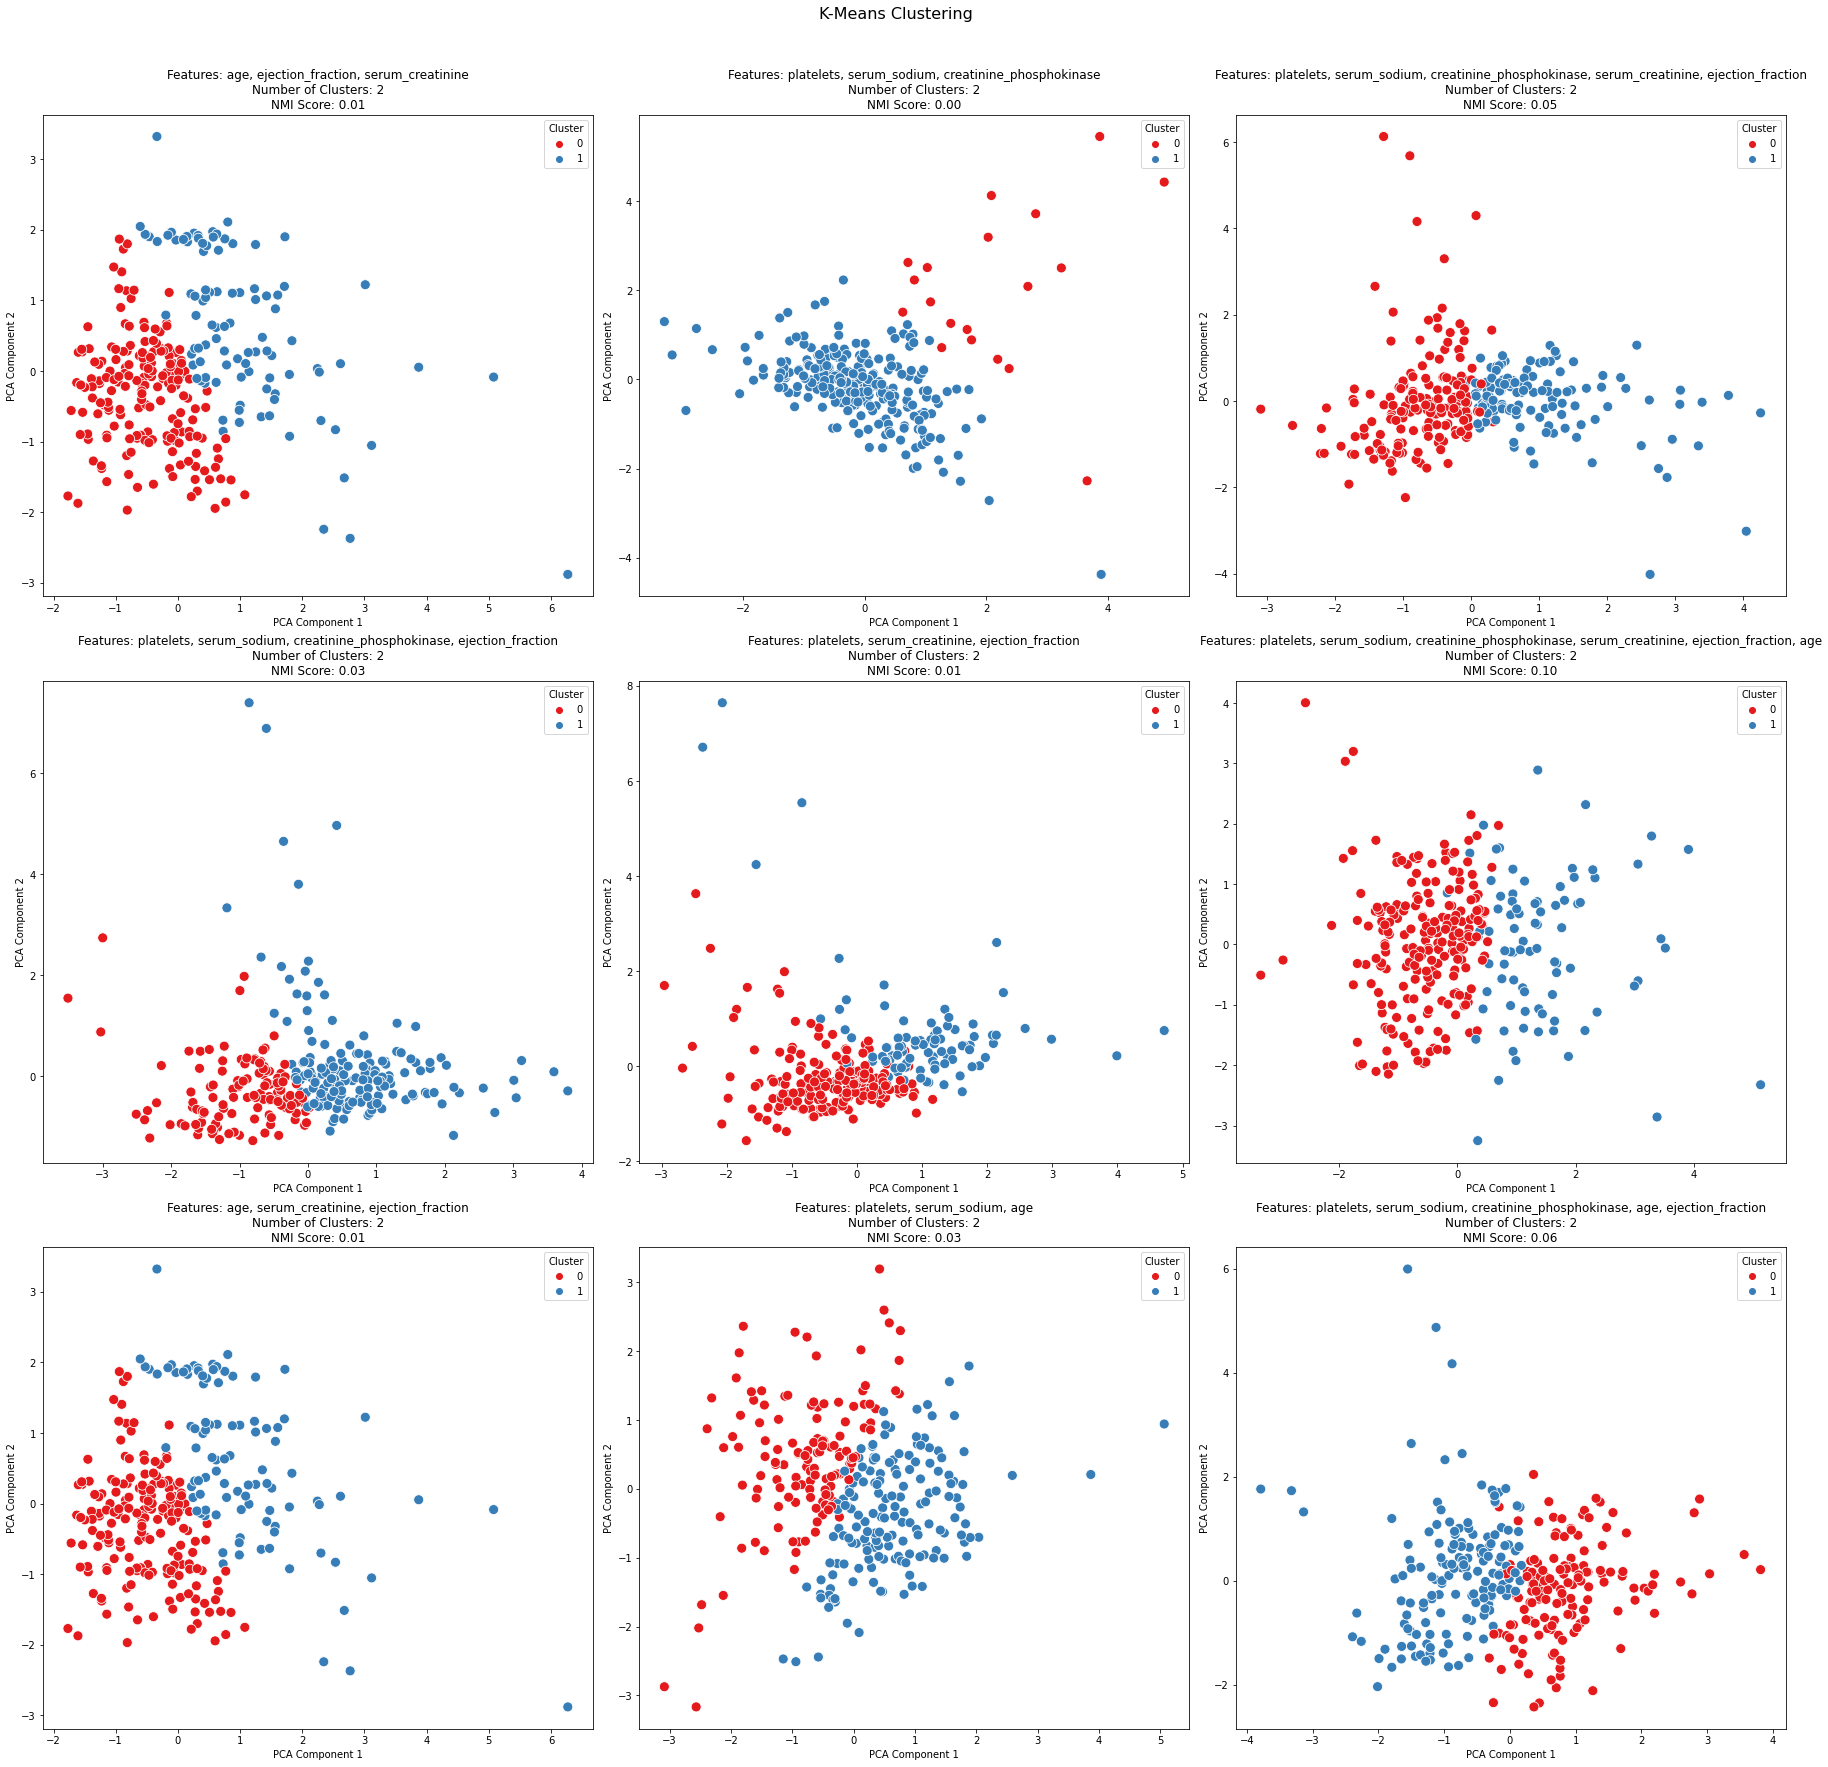

Best Features: platelets, serum_sodium, creatinine_phosphokinase, serum_creatinine, ejection_fraction, age
Best NMI Score: 0.18


In [332]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans


all_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

best_score = -1
best_features = None

scaler = StandardScaler()

def perform_clustering_and_visualization(features, n_clusters, ax):
    X = df[features]
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    score = normalized_mutual_info_score(df['DEATH_EVENT'], df['Cluster'])

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100, ax=ax)
    ax.set_title(f'Features: {", ".join(features)}\nNumber of Clusters: {n_clusters}\nNMI Score: {score:.2f}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend(title='Cluster')


feature_combinations = [
    ['age', 'ejection_fraction', 'serum_creatinine'],
    ['platelets', 'serum_sodium', 'creatinine_phosphokinase'],
    ['platelets', 'serum_sodium', 'creatinine_phosphokinase', 'serum_creatinine', 'ejection_fraction'],
    ['platelets', 'serum_sodium', 'creatinine_phosphokinase', 'ejection_fraction'],
    ['platelets', 'serum_creatinine', 'ejection_fraction'],
    ['platelets', 'serum_sodium', 'creatinine_phosphokinase', 'serum_creatinine', 'ejection_fraction', 'age'],
    ['age', 'serum_creatinine', 'ejection_fraction'],
    ['platelets', 'serum_sodium', 'age'],
    ['platelets', 'serum_sodium', 'creatinine_phosphokinase', 'age', 'ejection_fraction'],
]


fig, axs = plt.subplots(3, 3, figsize=(25, 25))
fig.suptitle("K-Means Clustering", fontsize=16)

for i, features in enumerate(feature_combinations):
    row, col = divmod(i, 3)
    ax = axs[row, col]
    perform_clustering_and_visualization(features, n_clusters=2, ax=ax) 
    

    X_subset = df[list(features)]
    X_scaled_subset = scaler.fit_transform(X_subset)
    kmeans_subset = KMeans(n_clusters=2, random_state=42)
    df['Cluster_subset'] = kmeans_subset.fit_predict(X_scaled_subset)
    score_subset = adjusted_rand_score(df['DEATH_EVENT'], df['Cluster_subset']) 
    
    if score_subset > best_score:
        best_score = score_subset
        best_features = features

for i in range(len(feature_combinations), 3 * 3):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

print(f"Best Features: {', '.join(best_features)}")
print(f"Best NMI Score: {best_score:.2f}")

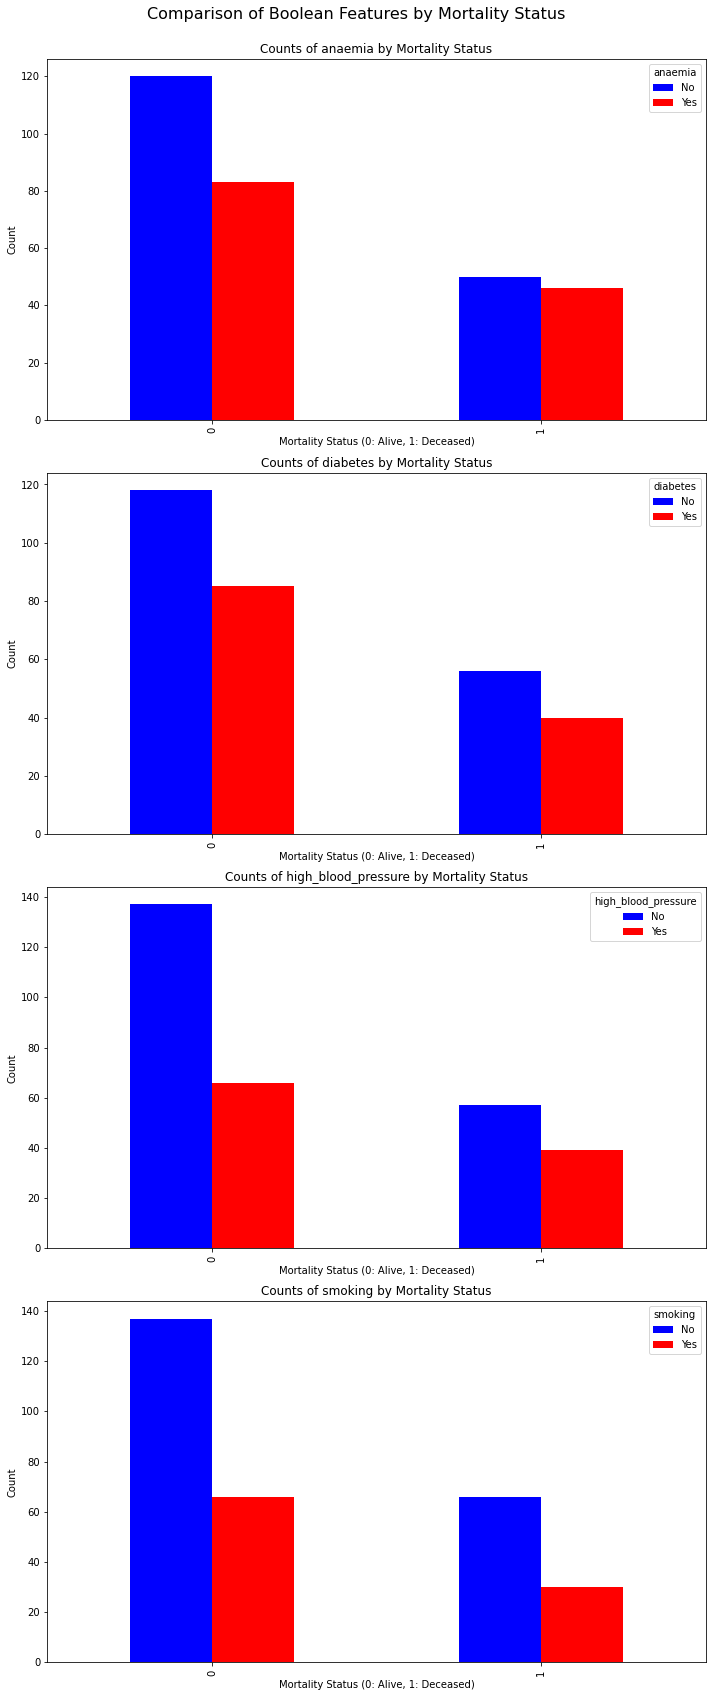

In [173]:
boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
mortality_counts = df.groupby('DEATH_EVENT')[boolean_features].sum().reset_index()

fig, axes = plt.subplots(len(boolean_features), 1, figsize=(10, 6 * len(boolean_features)))
fig.suptitle('Comparison of Boolean Features by Mortality Status', fontsize=16)

for i, feature in enumerate(boolean_features):
    ax = axes[i]
    mortality_counts = df.groupby(['DEATH_EVENT', feature]).size().unstack(fill_value=0)
    mortality_counts.plot(kind='bar', ax=ax, stacked=False, color=['blue', 'red'])
    ax.set_title(f'Counts of {feature} by Mortality Status')
    ax.set_xlabel('Mortality Status (0: Alive, 1: Deceased)')
    ax.set_ylabel('Count')
    ax.legend(title=feature, labels=['No', 'Yes'])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


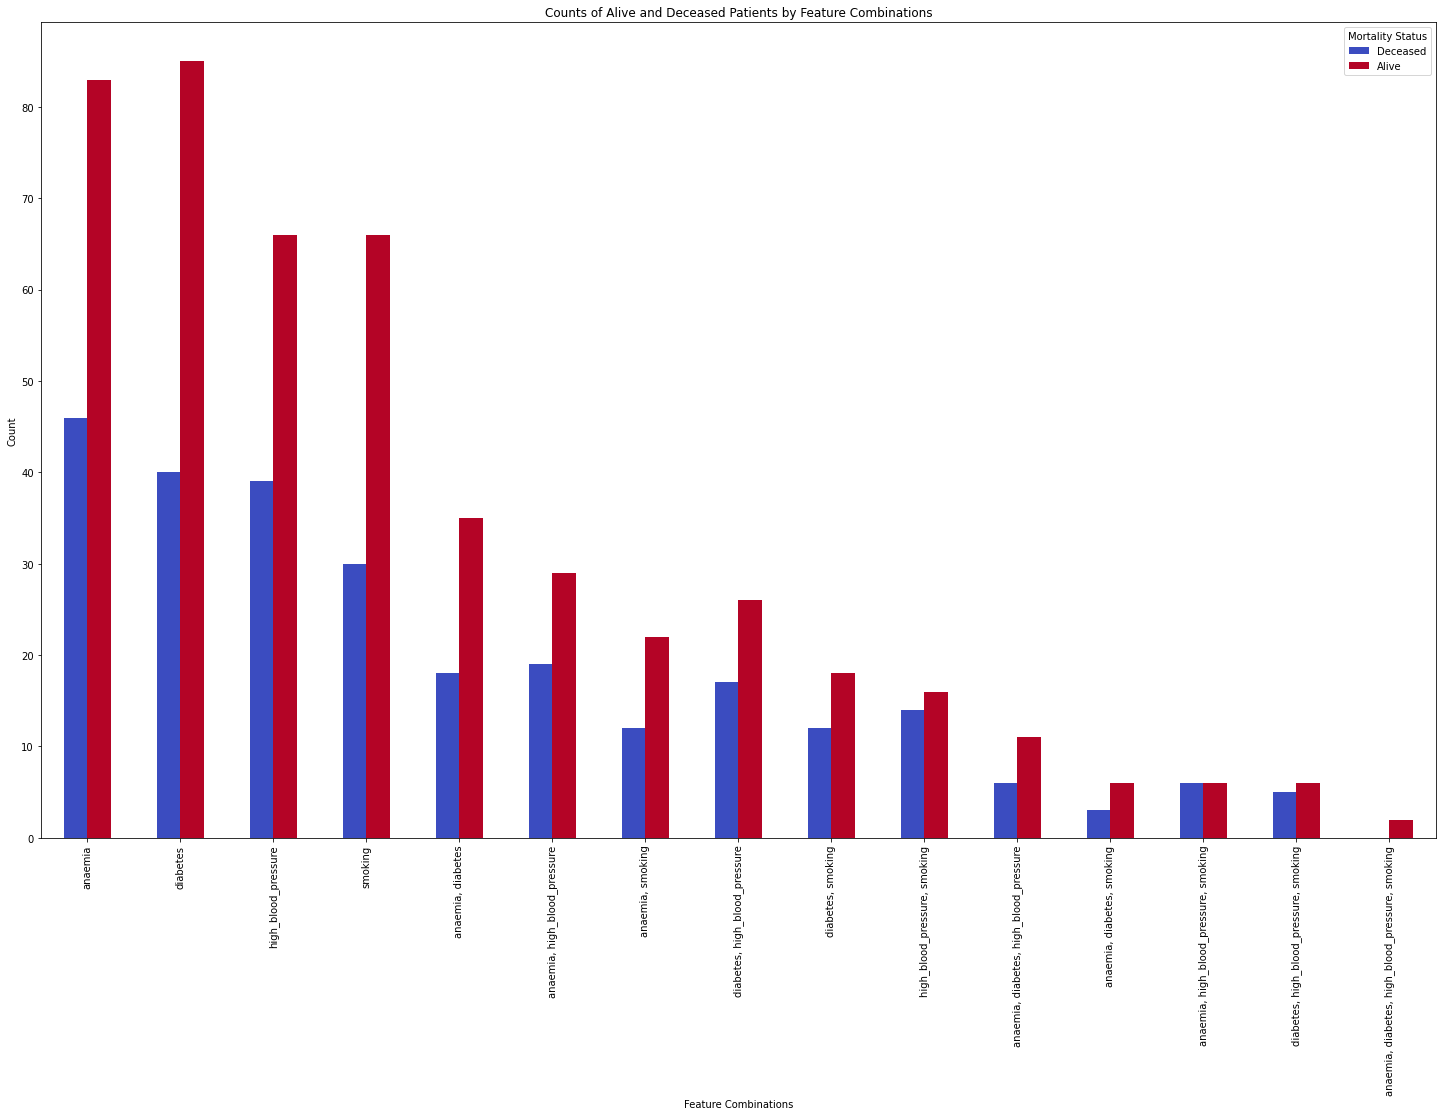

In [333]:
deceased_df = df[df['DEATH_EVENT'] == 1]
alive_df = df[df['DEATH_EVENT'] == 0]

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

combination_counts = {}

for num_features in range(1, len(boolean_features) + 1):
    for feature_combination in combinations(boolean_features, num_features):
        filtered_cases = df[list(feature_combination)].all(axis=1)
        deceased_count = deceased_df.loc[filtered_cases].shape[0]
        alive_count = alive_df.loc[filtered_cases].shape[0]
        combination_counts[', '.join(feature_combination)] = [deceased_count, alive_count]

counts_df = pd.DataFrame.from_dict(combination_counts, orient='index', columns=['Deceased Count', 'Alive Count'])
counts_df.index.name = 'Feature Combination'


plt.rcParams['figure.figsize'] = (25, 15)
counts_df.plot(kind='bar', stacked=False, cmap='coolwarm')
plt.title('Counts of Alive and Deceased Patients by Feature Combinations')
plt.xlabel('Feature Combinations')
plt.ylabel('Count')
plt.legend(title='Mortality Status', labels=['Deceased', 'Alive'])
plt.show()

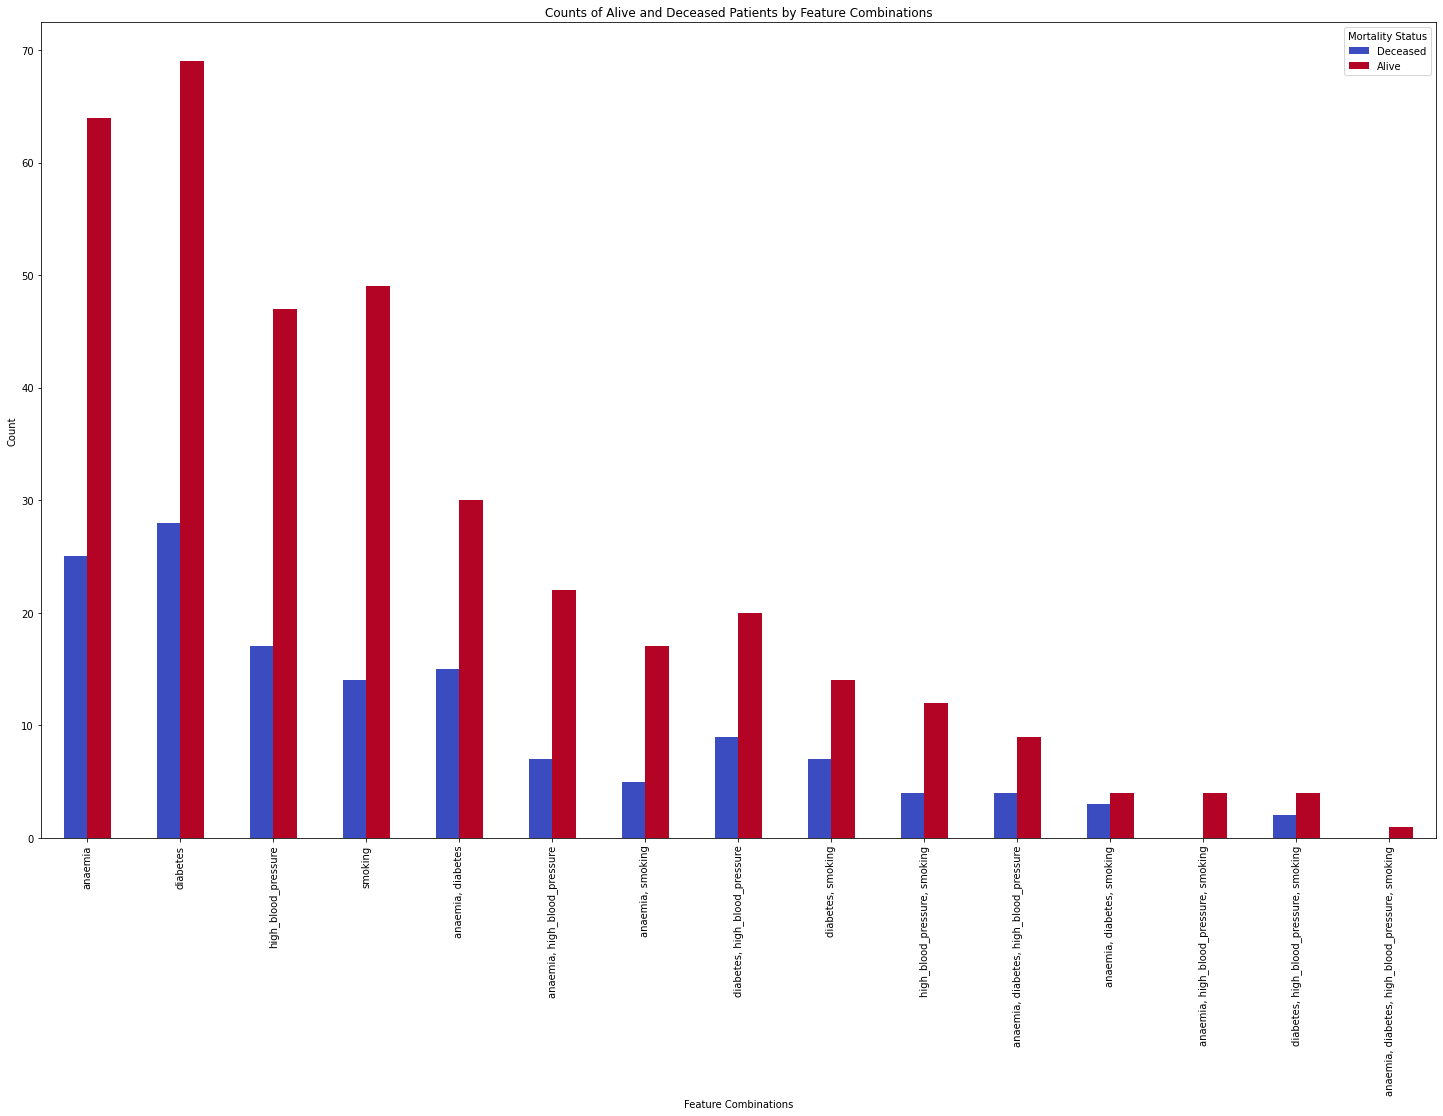

In [235]:
deceased_df = df_age1_bin[df_age1_bin['DEATH_EVENT'] == 1]
alive_df = df_age1_bin[df_age1_bin['DEATH_EVENT'] == 0]

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

combination_counts = {}

for num_features in range(1, len(boolean_features) + 1):
    for feature_combination in combinations(boolean_features, num_features):
        filtered_cases = df[list(feature_combination)].all(axis=1)
        deceased_count = deceased_df.loc[filtered_cases].shape[0]
        alive_count = alive_df.loc[filtered_cases].shape[0]
        combination_counts[', '.join(feature_combination)] = [deceased_count, alive_count]

counts_df = pd.DataFrame.from_dict(combination_counts, orient='index', columns=['Deceased Count', 'Alive Count'])
counts_df.index.name = 'Feature Combination'


plt.rcParams['figure.figsize'] = (25, 15)
counts_df.plot(kind='bar', stacked=False, cmap='coolwarm')
plt.title('Counts of Alive and Deceased Patients by Feature Combinations')
plt.xlabel('Feature Combinations')
plt.ylabel('Count')
plt.legend(title='Mortality Status', labels=['Deceased', 'Alive'])
plt.show()

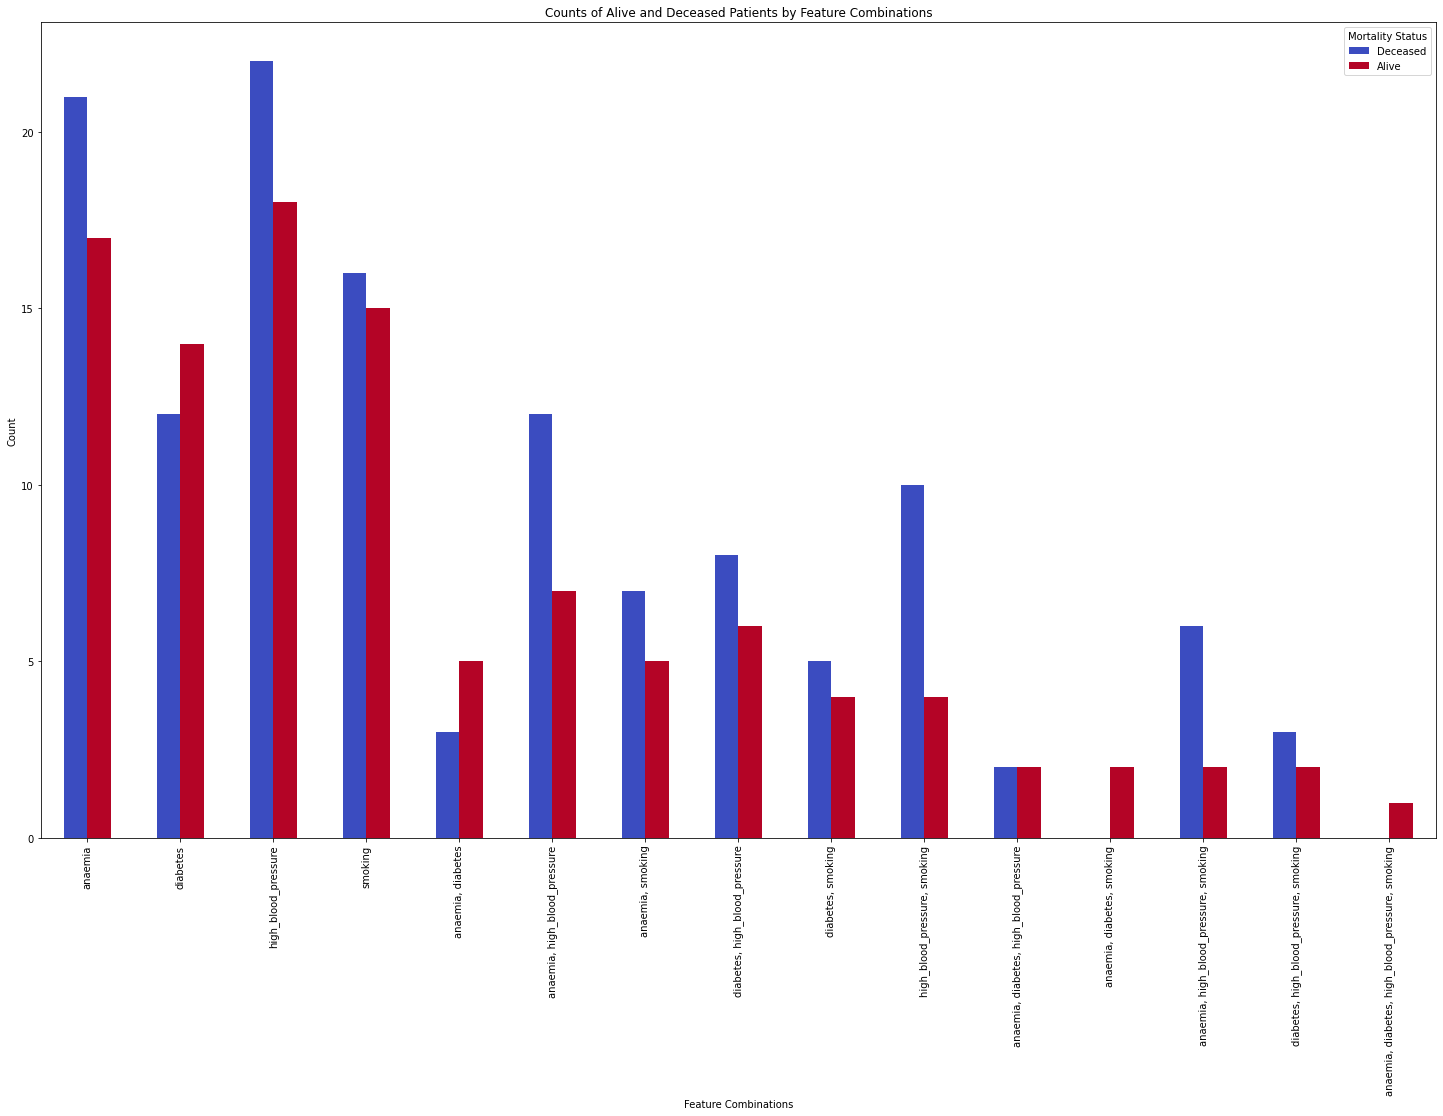

In [237]:
deceased_df = df_age2_bin[df_age2_bin['DEATH_EVENT'] == 1]
alive_df = df_age2_bin[df_age2_bin['DEATH_EVENT'] == 0]

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']

combination_counts = {}

for num_features in range(1, len(boolean_features) + 1):
    for feature_combination in combinations(boolean_features, num_features):
        filtered_cases = df[list(feature_combination)].all(axis=1)
        deceased_count = deceased_df.loc[filtered_cases].shape[0]
        alive_count = alive_df.loc[filtered_cases].shape[0]
        combination_counts[', '.join(feature_combination)] = [deceased_count, alive_count]

counts_df = pd.DataFrame.from_dict(combination_counts, orient='index', columns=['Deceased Count', 'Alive Count'])
counts_df.index.name = 'Feature Combination'


plt.rcParams['figure.figsize'] = (25, 15)
counts_df.plot(kind='bar', stacked=False, cmap='coolwarm')
plt.title('Counts of Alive and Deceased Patients by Feature Combinations')
plt.xlabel('Feature Combinations')
plt.ylabel('Count')
plt.legend(title='Mortality Status', labels=['Deceased', 'Alive'])
plt.show()